In [1]:
from PIL import Image
from PIL import GifImagePlugin
import numpy as np
import matplotlib.pyplot as plt
import os
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
file_dir="C:/Users/rhish/Downloads/archive/data"
file_list=os.listdir(file_dir)

In [ ]:
img=[]
for file in file_list:
    if(file=='Readme.txt'):
        continue
    else:
        path=os.path.join(file_dir,file)
        image=Image.open(path)
        image=image.resize((32,32))
        display(image)
        image=np.asarray(image)
        image=image.reshape(-1,)
        img.append(image)

In [3]:
#getting image dimensions as a vector
img[0].shape

(1024,)

In [4]:
labels=[x.split('.')[1] for x in file_list]
labels.remove('txt')
unique_labels=list(set(labels))
unique_labels

['happy',
 'sad',
 'rightlight',
 'sleepy',
 'surprised',
 'noglasses',
 'leftlight',
 'centerlight',
 'wink',
 'normal',
 'glasses']

In [5]:
len(labels)

165

In [6]:
img=np.array(img)
img.shape

(165, 1024)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import time
import pandas as pd
#returns projection matrix
def preprocessing(img,method='PCA'):
    if(method=='PCA'):
        from sklearn.decomposition import PCA
        pca=PCA(n_components=min(len(img),img[0].shape[0]))
        new_img=pca.fit_transform(img)
        plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
        plt.title("PCA: Plot to choose number of components")
        plt.xlabel('Number of components')
        plt.ylabel('Variance')
        plt.grid()
        plt.show()
        tol=99
        count=0
        for var in np.cumsum(pca.explained_variance_ratio_*100):
            count+=1
            if(var>=tol):
                break
        pca=PCA(n_components=count)
        print('With tolerance (of variance, in percentage)=',tol,'\nNumber of components chosen for PCA:',count)
        new_img=pca.fit_transform(img)
    return new_img
#returns accuracy and time taken
def baseline(data,labels,tsize,seed):
    start=time.time()
    x_train,x_test,y_train,y_test=train_test_split(data,labels,train_size=tsize,random_state=seed)
    knn=KNeighborsClassifier(n_neighbors=1,metric='euclidean')
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    end=time.time()
    accuracy=accuracy_score(pred,y_test)
    time_taken=round((end-start)*1000,3)
#     print("Accuracy=",accuracy,time_taken)
    return accuracy,time_taken
#returns accuracy and time taken
def LDA(data,labels,tsize,seed):
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    start=time.time()
    data=preprocessing(data)
    x_train,x_test,y_train,y_test=train_test_split(data,labels,train_size=tsize,random_state=seed)
    lda=LinearDiscriminantAnalysis()
    new_img=lda.fit_transform(data,labels)
    pred=lda.predict(x_test)
    end=time.time()
    accuracy=accuracy_score(pred,y_test)
    time_taken=round((end-start)*1000,3)
#     print("Accuracy=",accuracy,time_taken)
    return new_img,accuracy,time_taken

In [8]:
def create_table(data,labels,model,choice):
    train_sizes=[10,20,30]
    table={}
    for size in train_sizes:
        accuracies=[]
        times=[]
        for i in range(20):
            new_data=data
            if(model is LDA):
                new_data,a, t=LDA(data,labels,size/len(data),i)
            if(choice=='LDA'):
                accuracies.append(a)
                times.append(t)
                continue
            else:
                a, t=baseline(new_data,labels,size/len(data),i)
                accuracies.append(a)
                times.append(t)
        a=sum(accuracies)/len(accuracies)
        t=str(round(sum(times)/len(times),3))+' ms'
        table[size]=[a,t]
    table=pd.DataFrame(table)
    table=table.rename(index={0:'Accuracy',1:'Time taken'})
    return table

In [9]:
create_table(img,labels,baseline,'base')

,10,20,30
Accuracy,0.145161,0.147931,0.162593
Time taken,3.404 ms,3.244 ms,3.084 ms


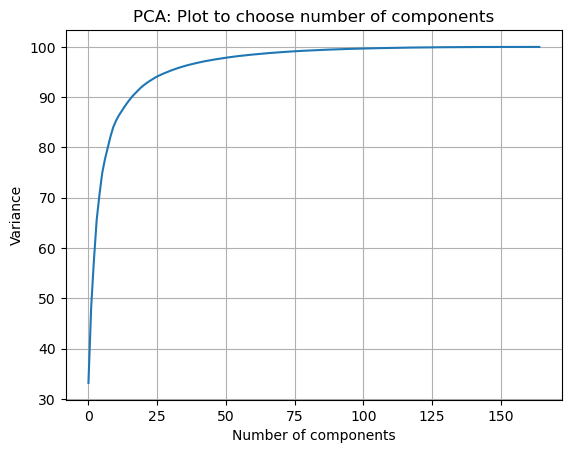

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7806451612903226 119.097


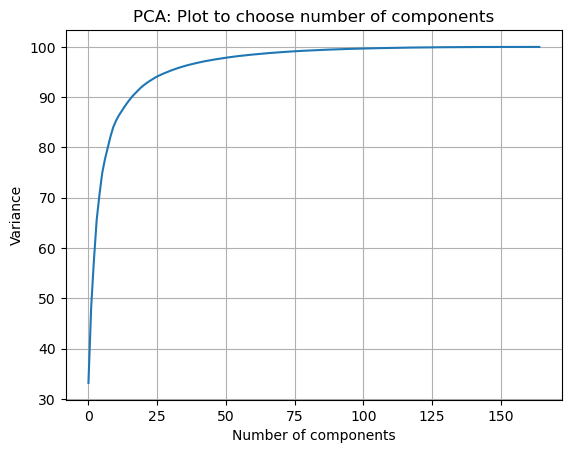

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7870967741935484 102.967


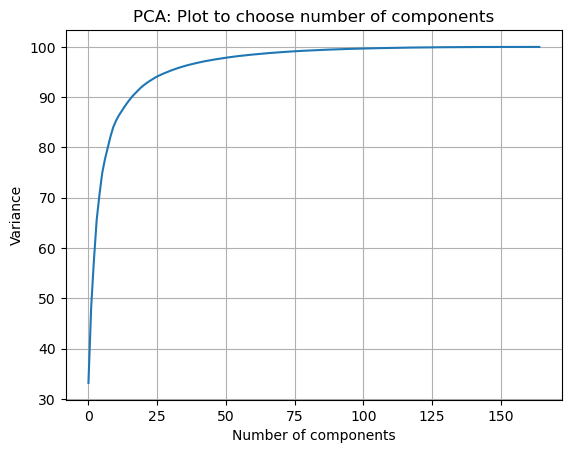

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.8 106.172


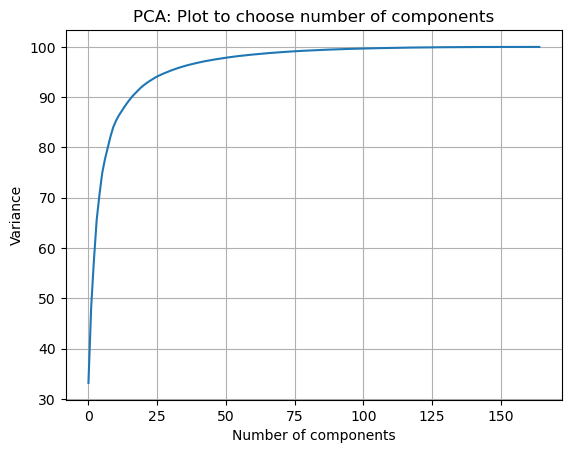

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7935483870967742 101.806


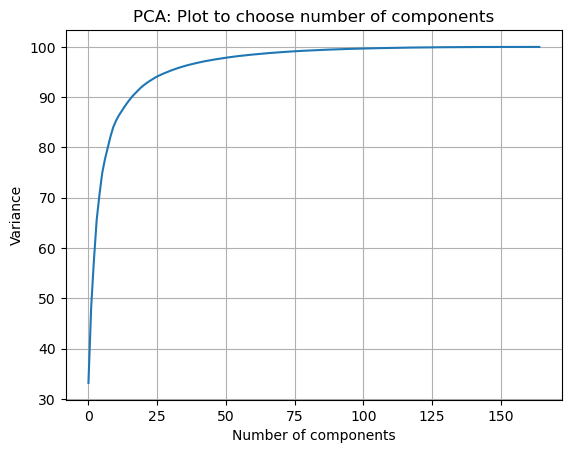

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7870967741935484 97.091


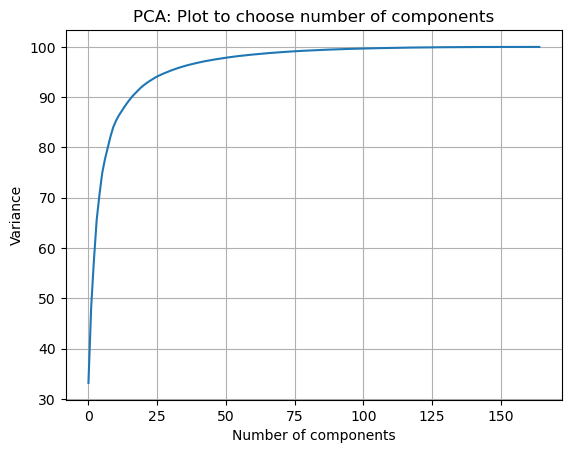

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7870967741935484 98.398


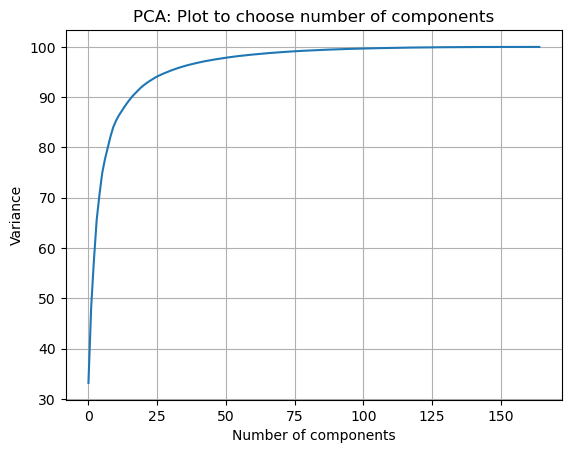

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7935483870967742 113.965


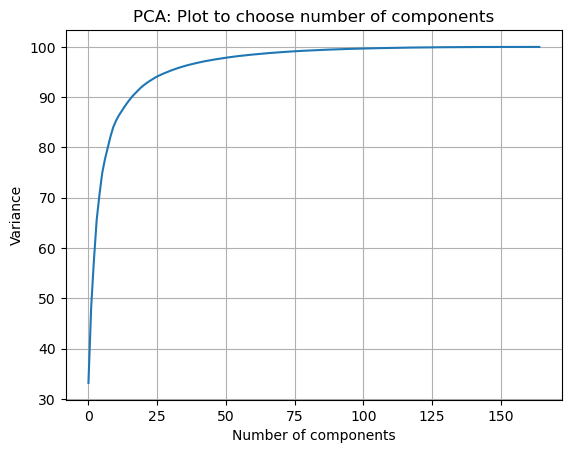

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7935483870967742 105.597


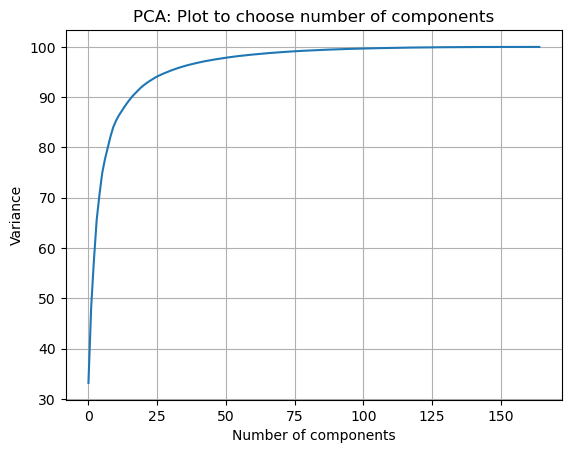

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.8 93.187


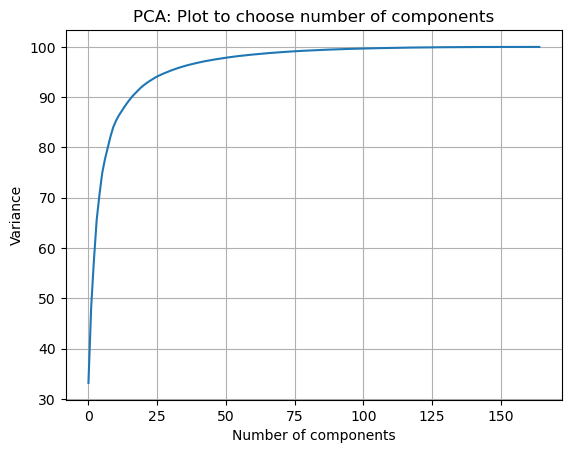

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7935483870967742 113.065


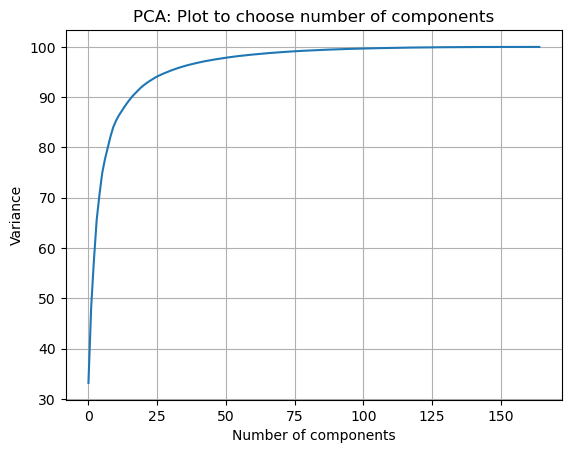

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7741935483870968 98.126


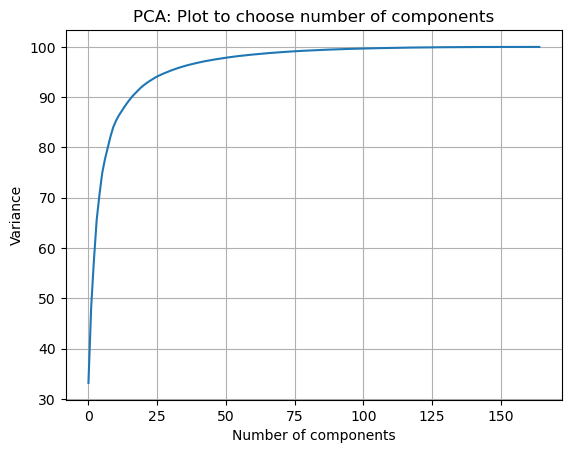

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7935483870967742 110.069


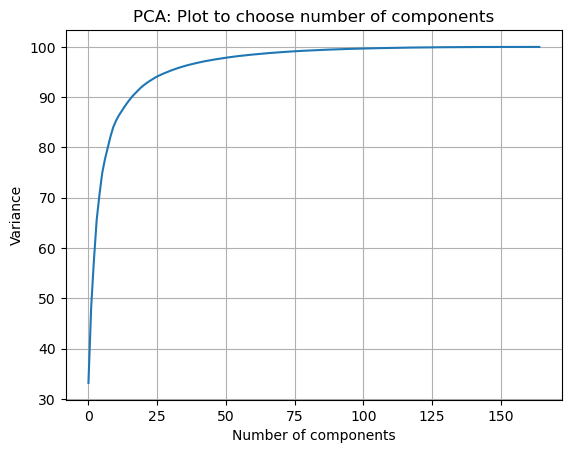

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7806451612903226 155.685


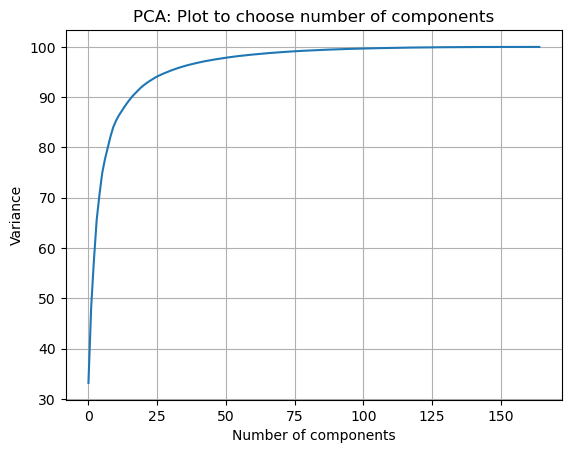

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7870967741935484 105.103


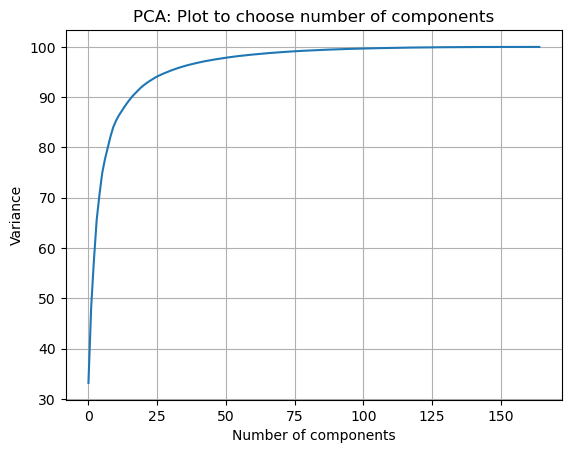

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7935483870967742 122.16


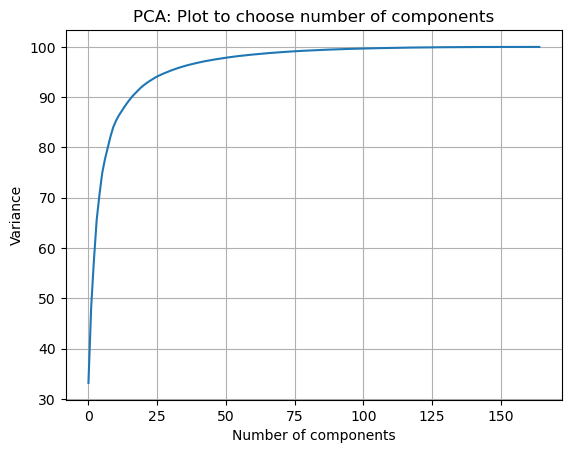

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7935483870967742 116.878


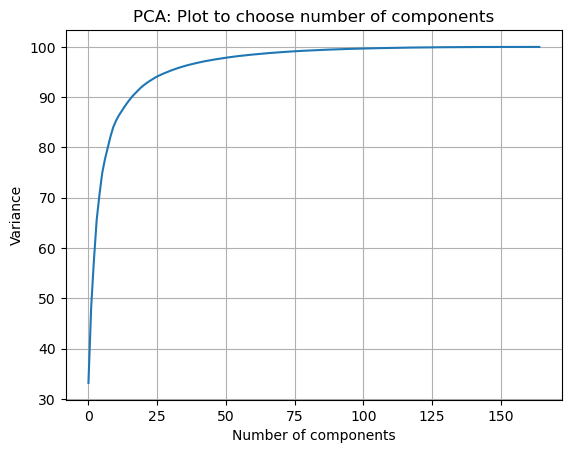

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7806451612903226 107.024


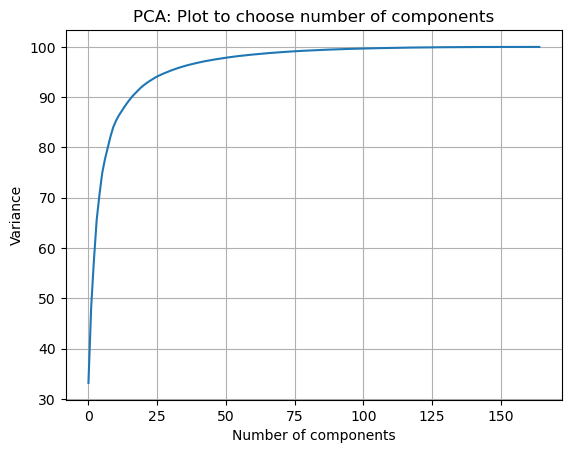

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7870967741935484 118.591


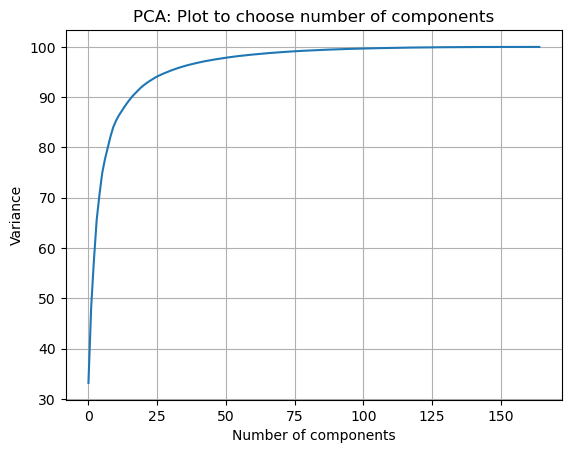

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.8 116.488


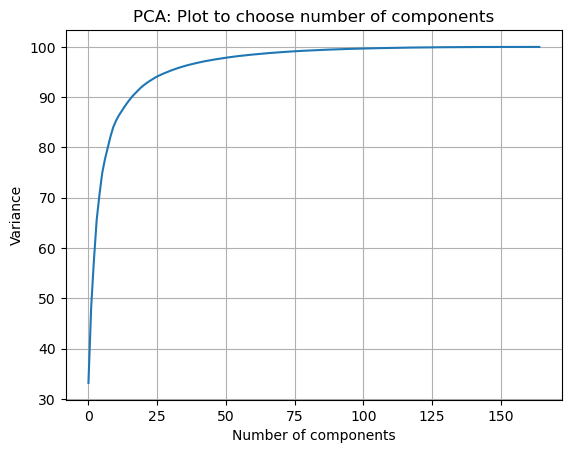

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7870967741935484 91.48


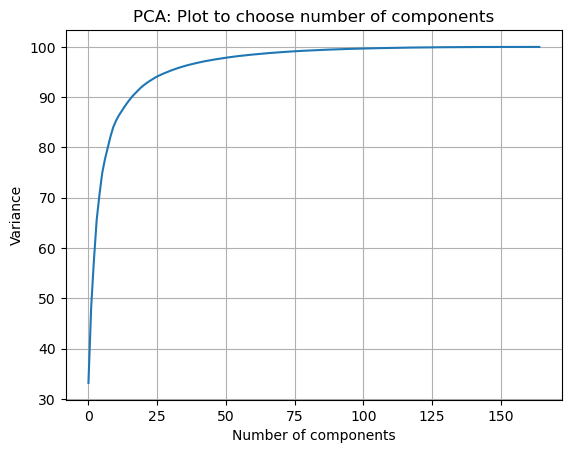

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7655172413793103 109.051


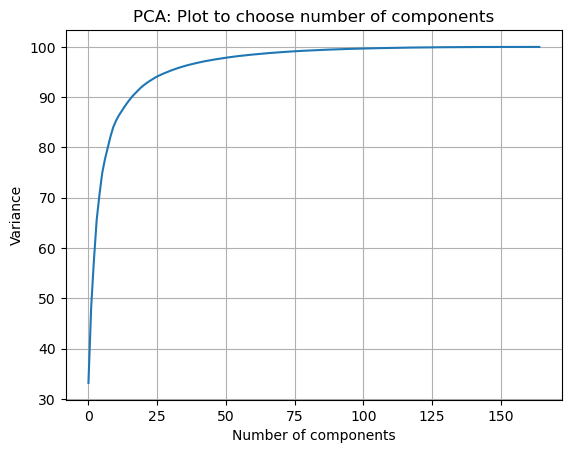

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7862068965517242 129.907


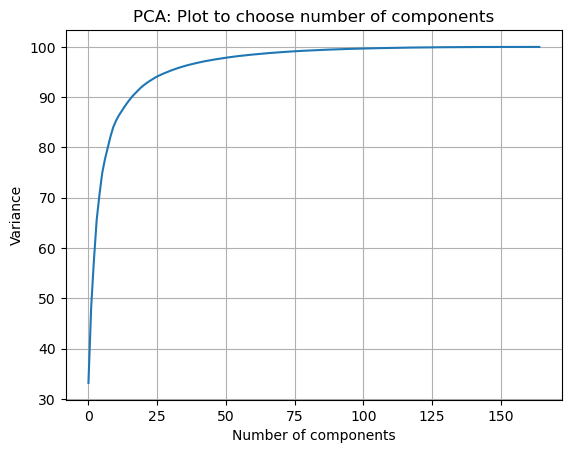

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7793103448275862 124.071


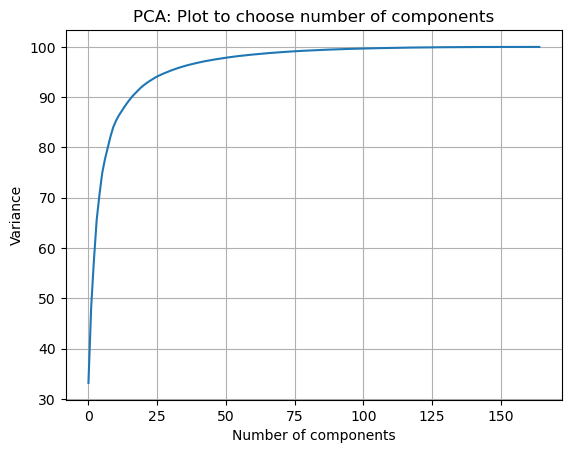

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7931034482758621 117.558


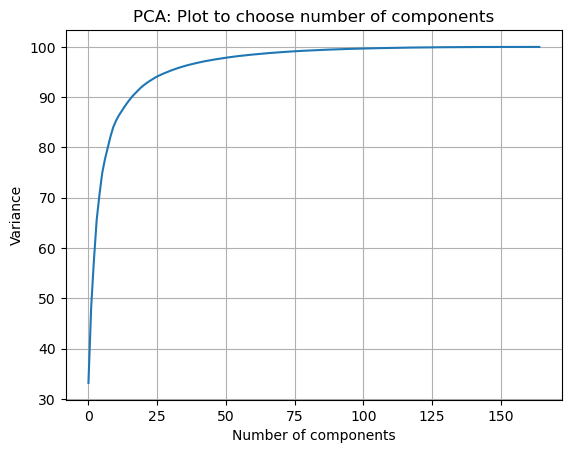

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7931034482758621 122.694


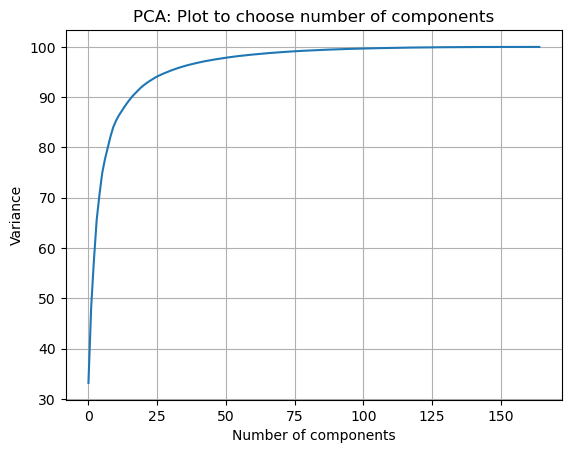

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7724137931034483 119.437


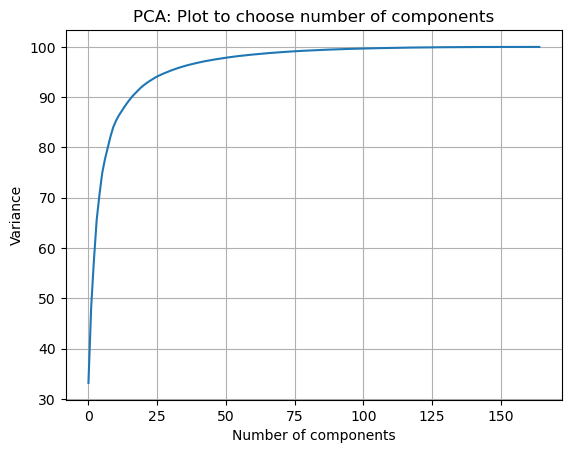

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.8068965517241379 186.725


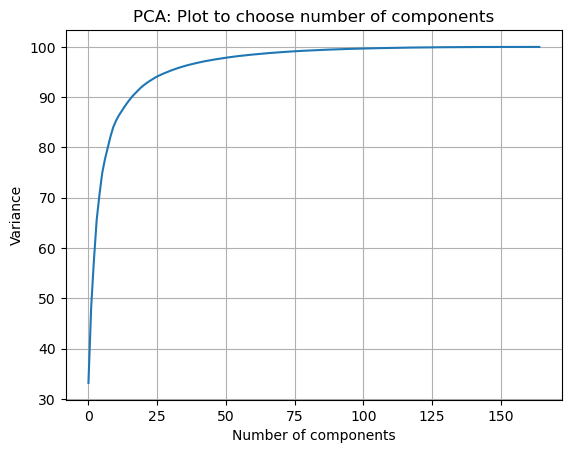

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7862068965517242 115.483


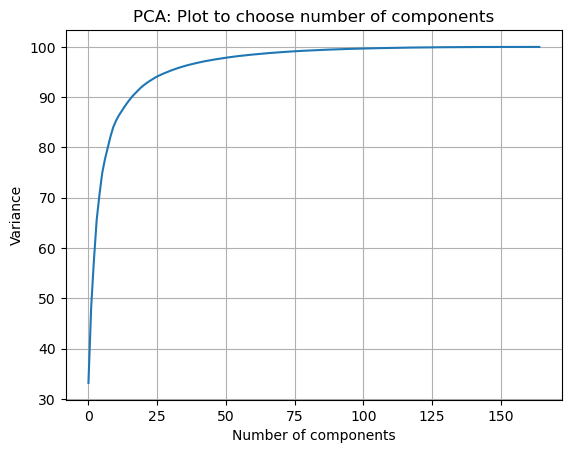

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7931034482758621 118.672


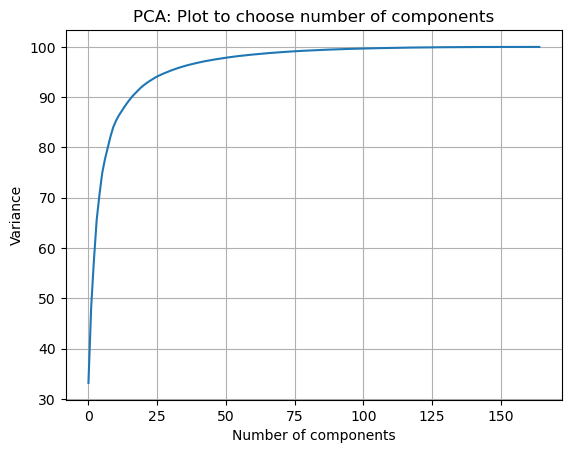

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.8 118.597


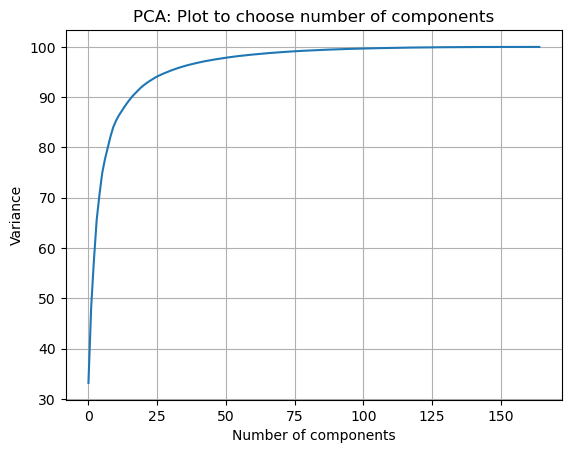

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.8 119.112


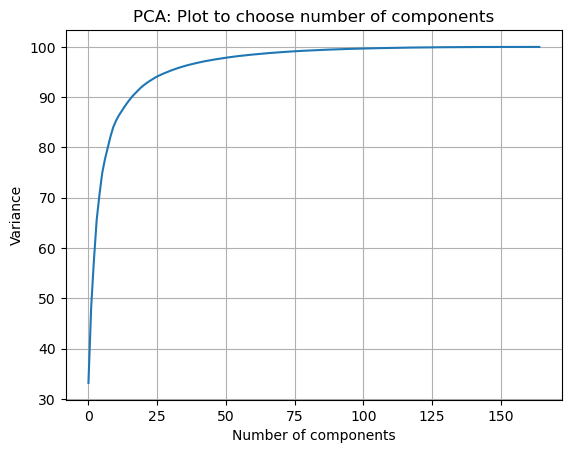

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.8068965517241379 118.005


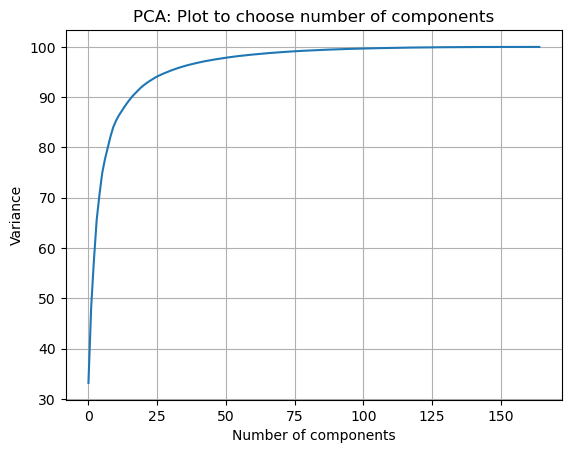

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7862068965517242 120.834


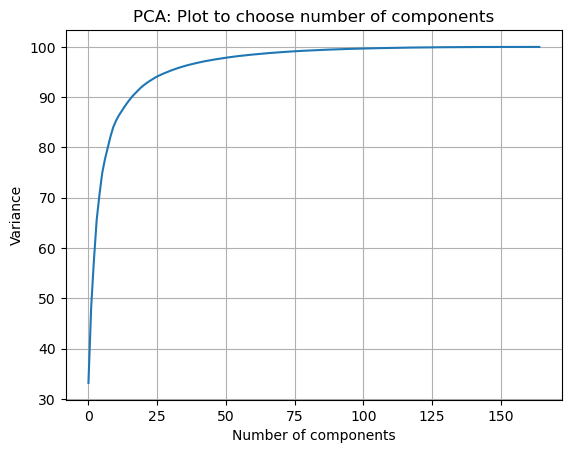

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.8068965517241379 127.177


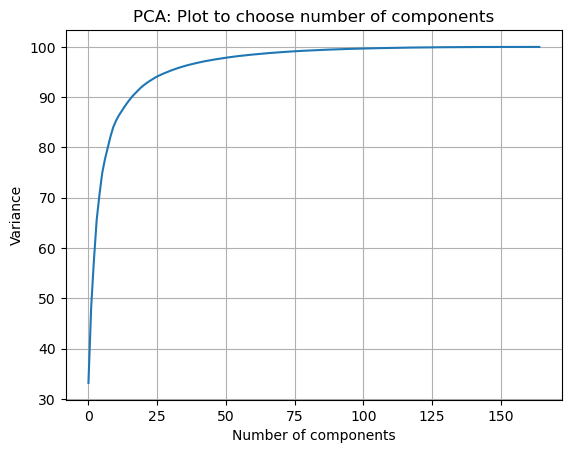

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.8 117.067


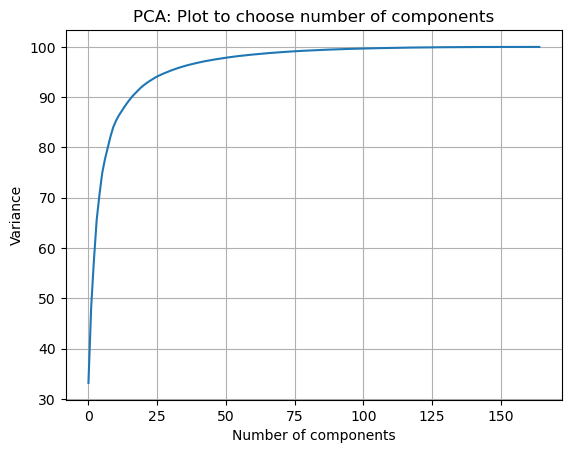

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7931034482758621 123.529


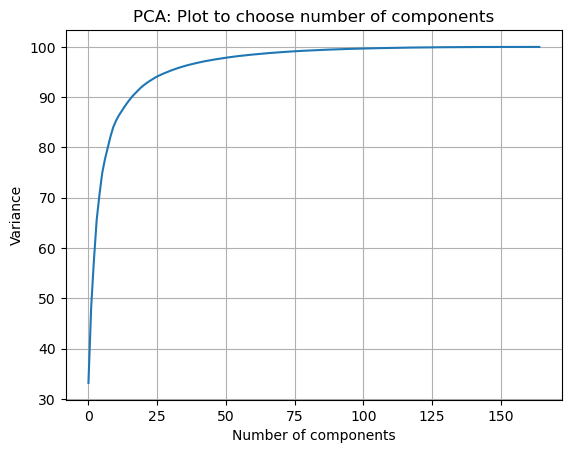

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7655172413793103 124.033


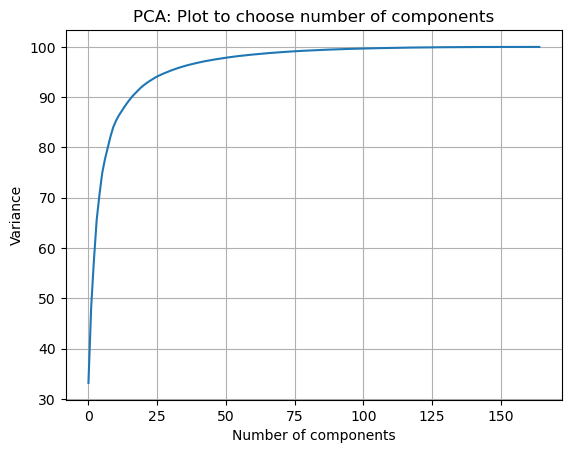

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.8068965517241379 143.664


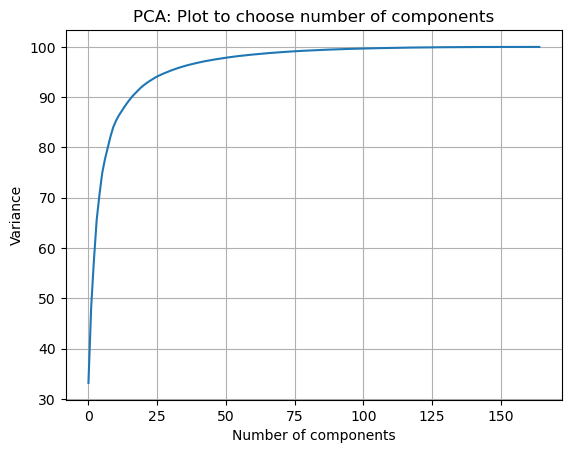

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7931034482758621 124.187


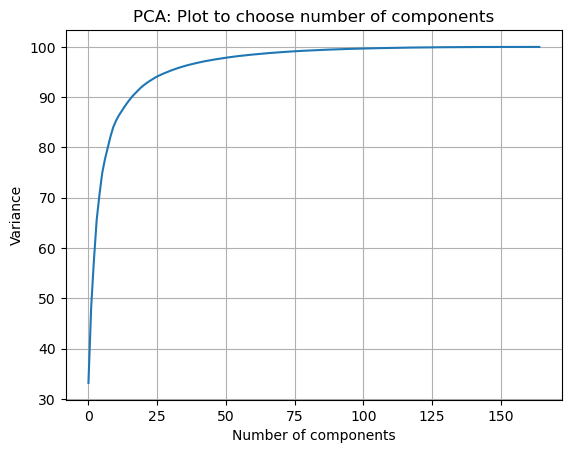

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7931034482758621 122.422


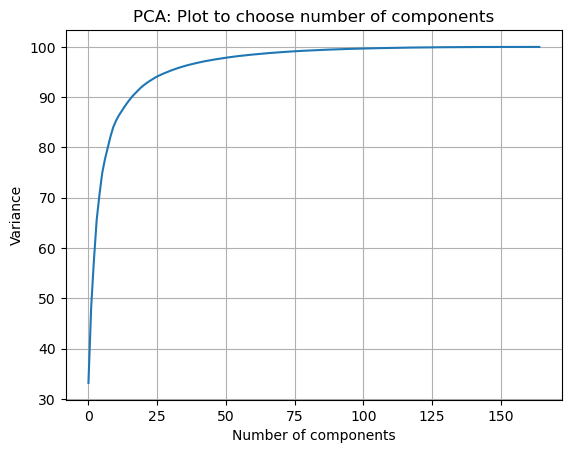

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7481481481481481 187.33


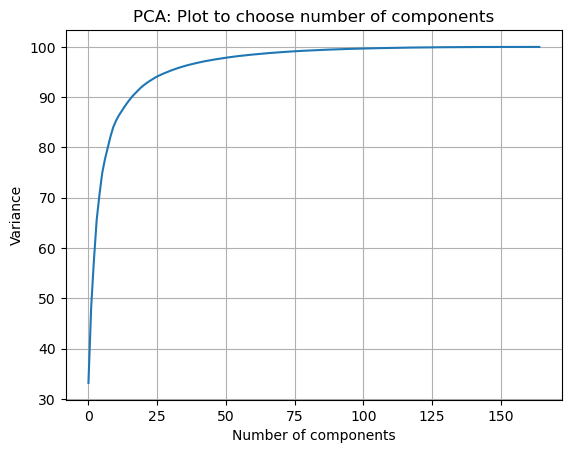

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.8148148148148148 118.73


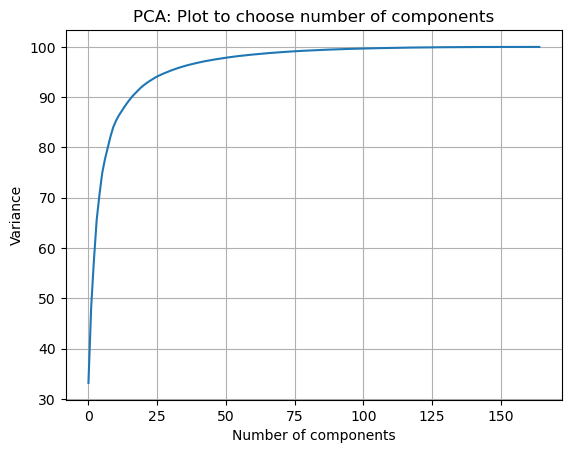

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7777777777777778 126.158


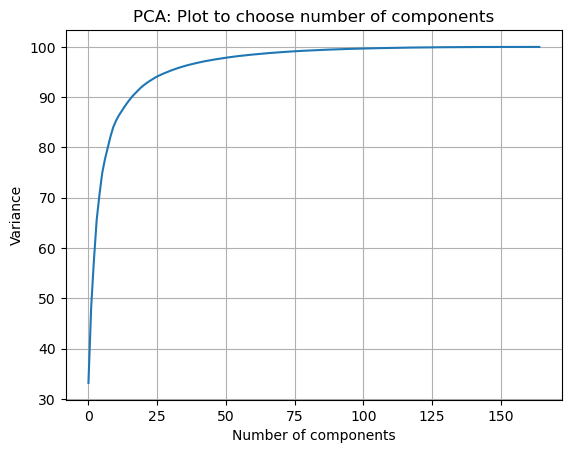

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7777777777777778 149.743


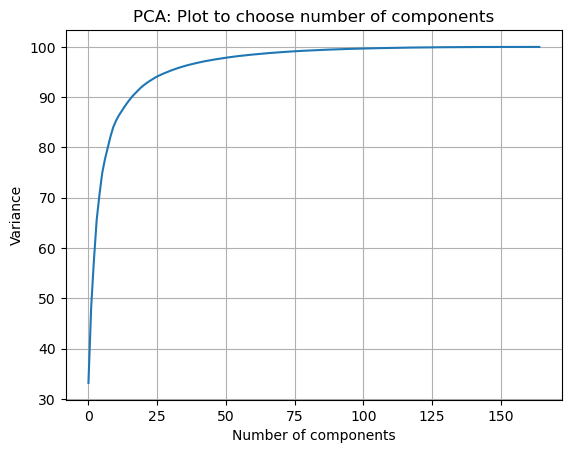

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7925925925925926 139.345


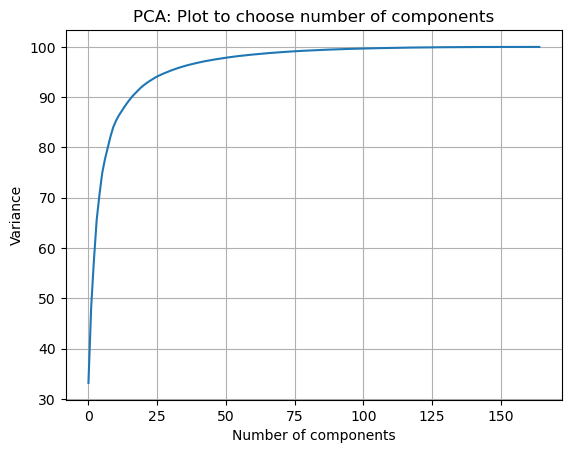

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.762962962962963 131.81


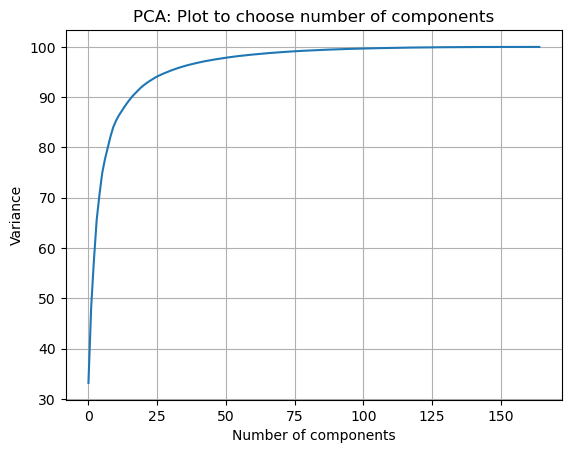

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.8 139.242


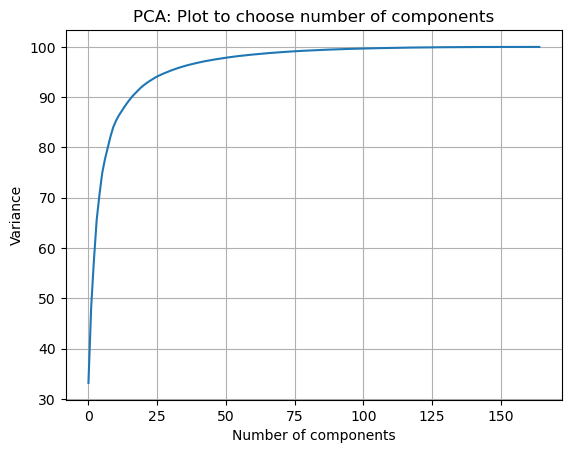

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7777777777777778 140.205


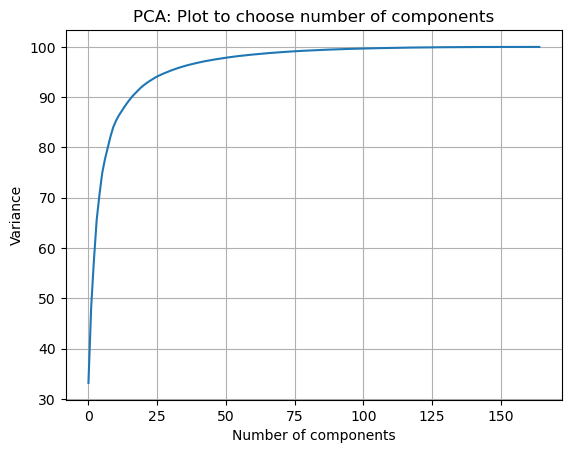

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7925925925925926 138.236


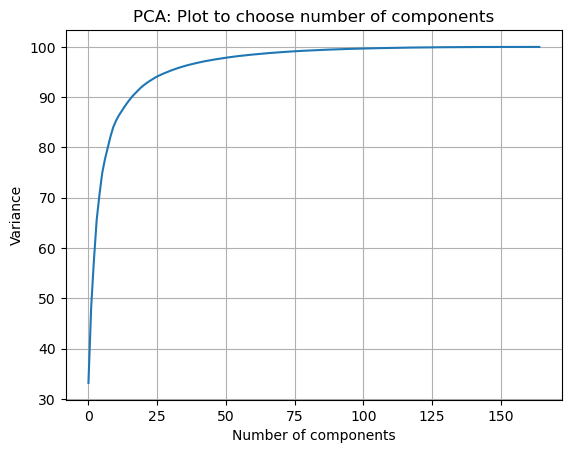

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.8 155.32


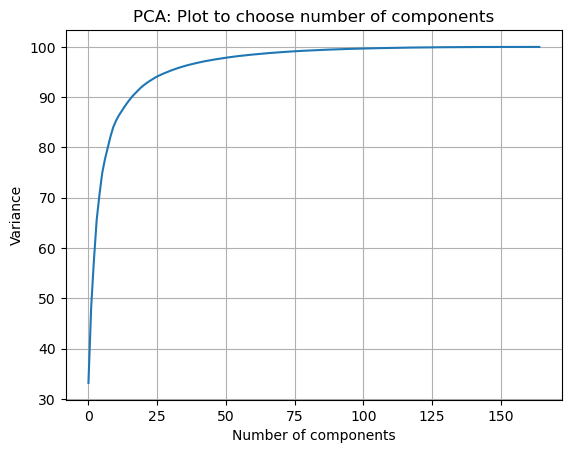

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.8074074074074075 141.54


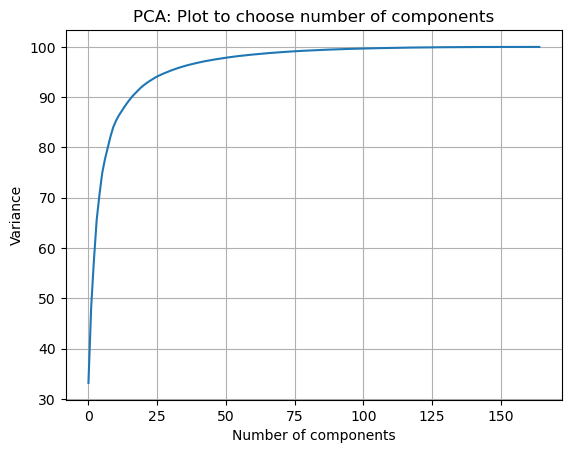

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.8074074074074075 138.555


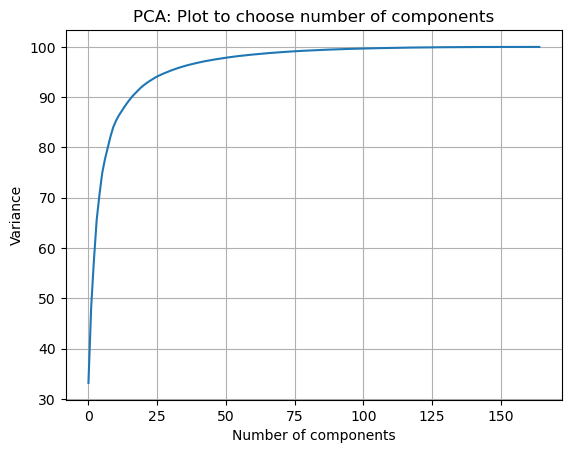

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7925925925925926 134.846


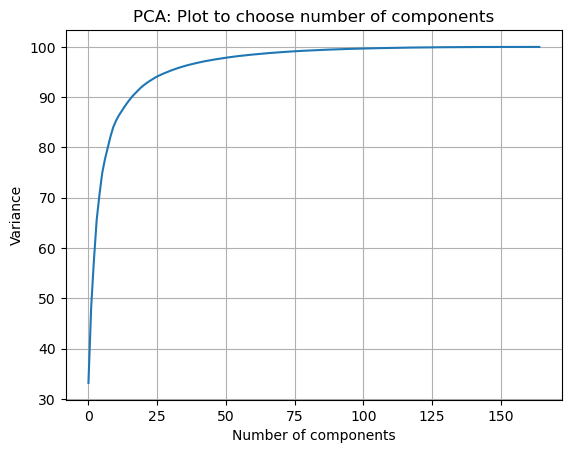

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.8148148148148148 133.38


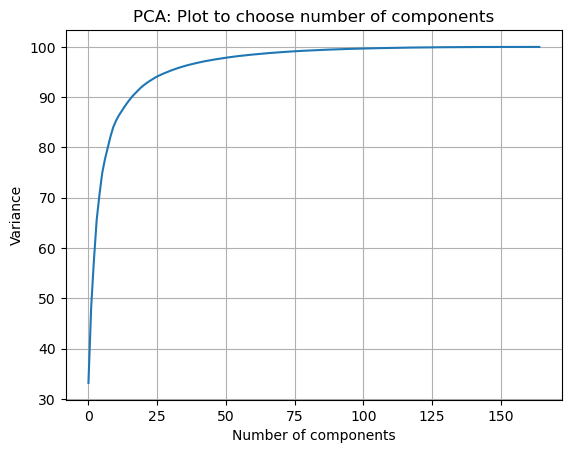

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7925925925925926 214.839


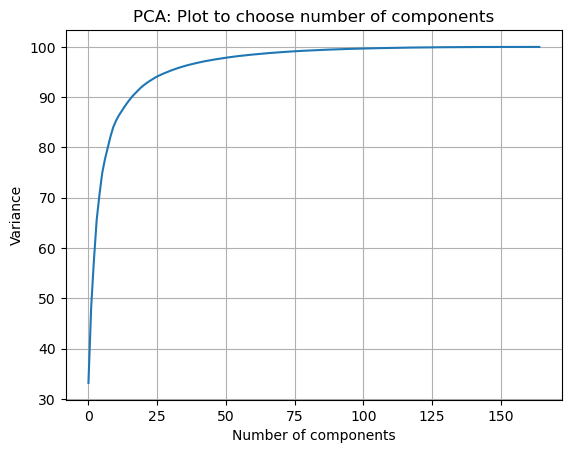

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7925925925925926 138.419


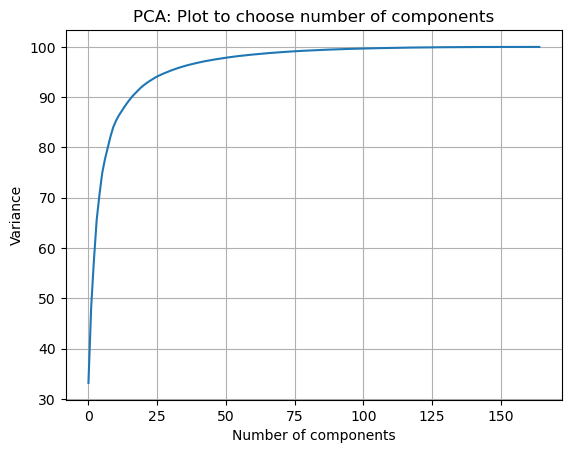

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7851851851851852 141.771


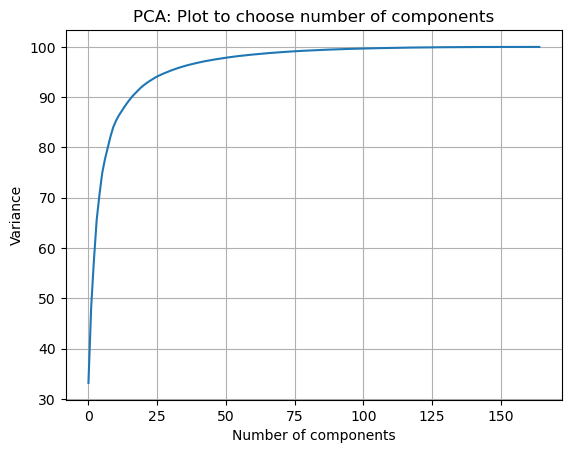

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.762962962962963 145.179


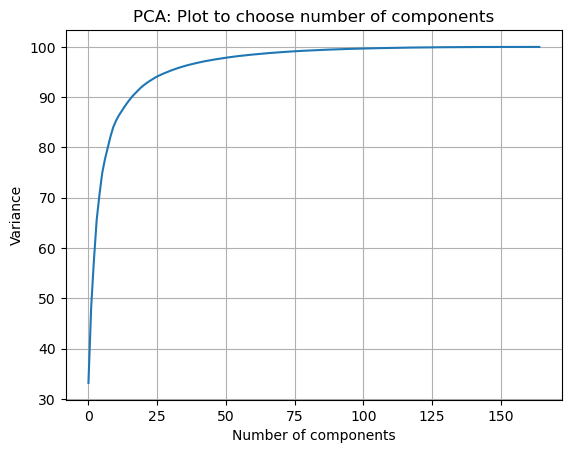

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7777777777777778 140.698


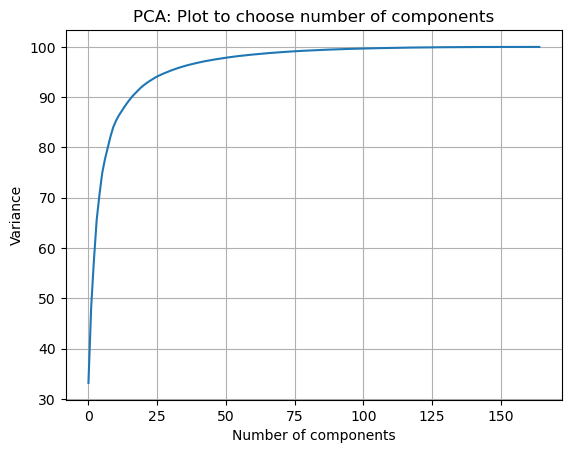

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7925925925925926 137.9


,10,20,30
Accuracy,0.353548,0.461034,0.511852
Time taken,3.966 ms,3.502 ms,3.876 ms


In [10]:
create_table(img,labels,LDA,'base')

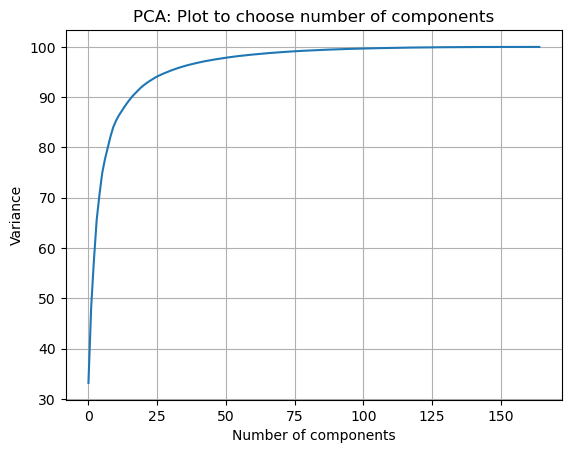

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7806451612903226 130.03


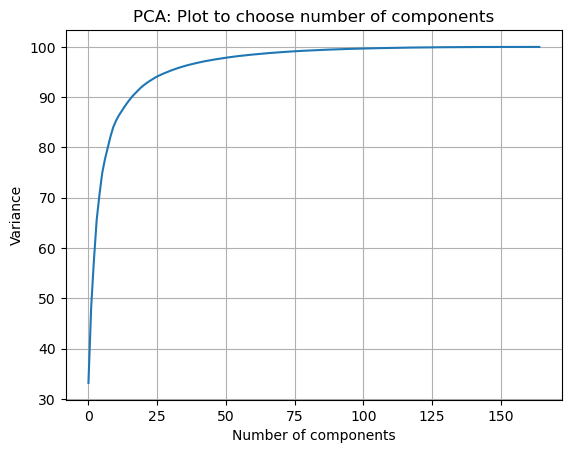

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7870967741935484 135.003


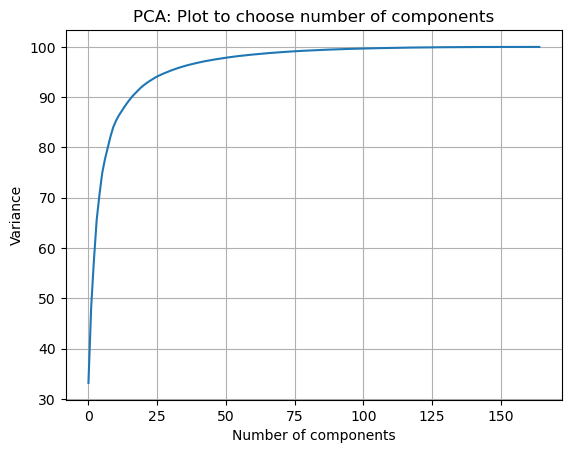

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7806451612903226 134.35


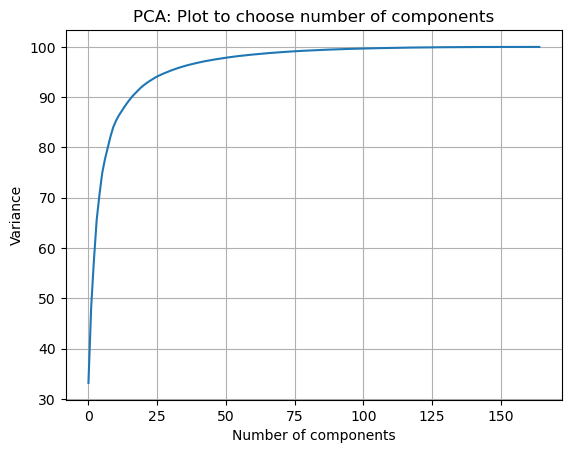

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7806451612903226 141.192


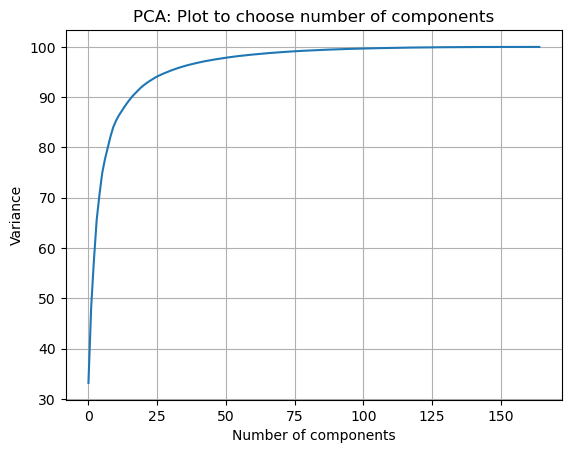

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7935483870967742 150.308


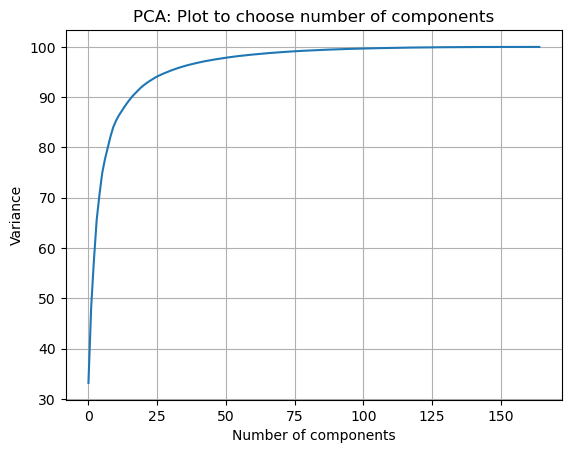

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7935483870967742 150.268


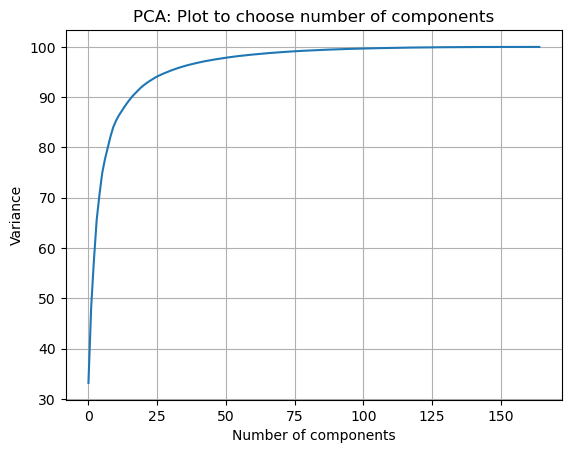

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7935483870967742 132.287


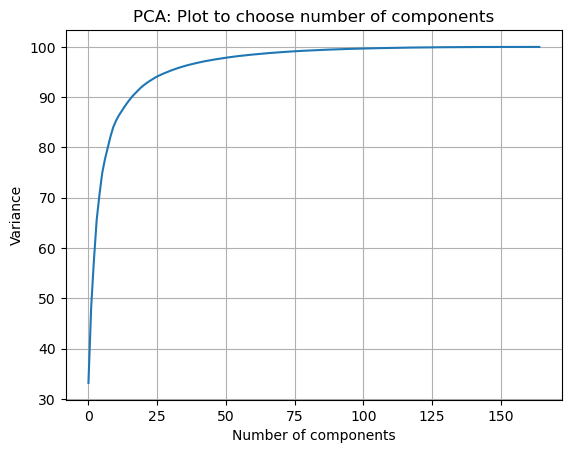

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7935483870967742 131.084


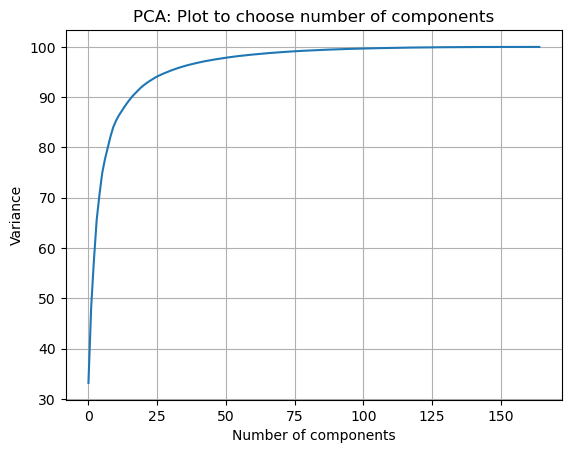

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.8064516129032258 205.869


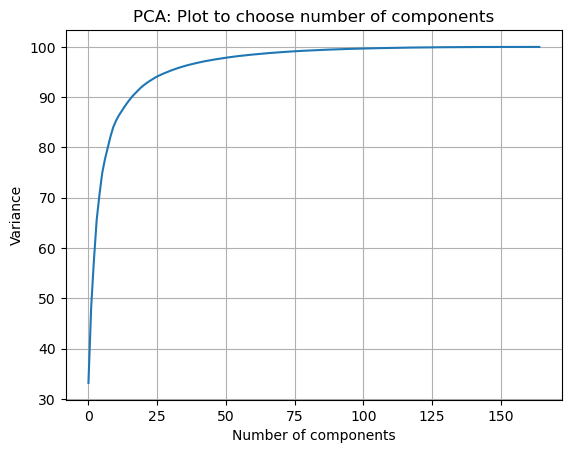

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.8064516129032258 186.789


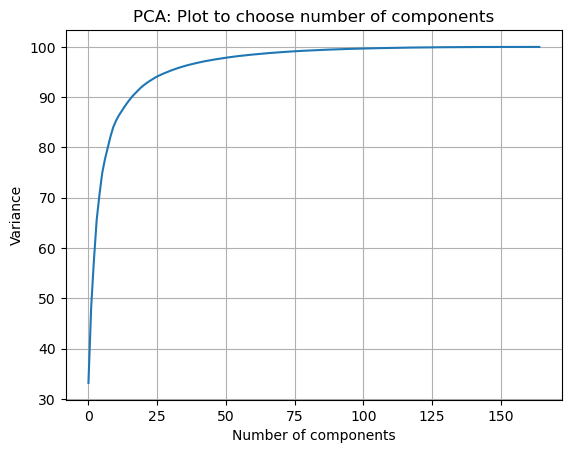

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7806451612903226 166.408


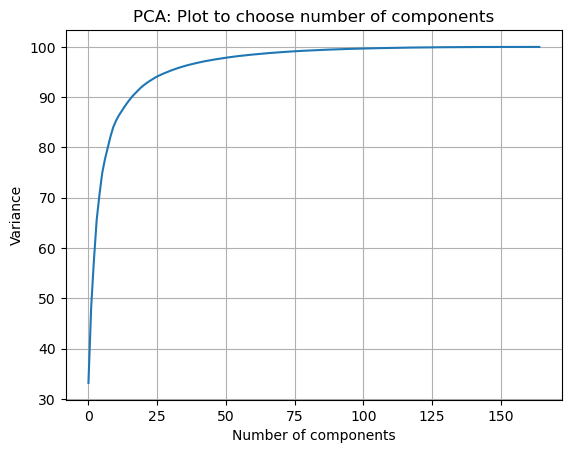

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.8 138.293


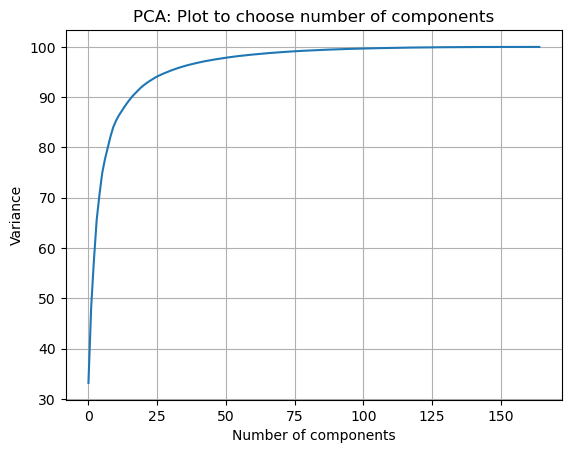

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7806451612903226 161.237


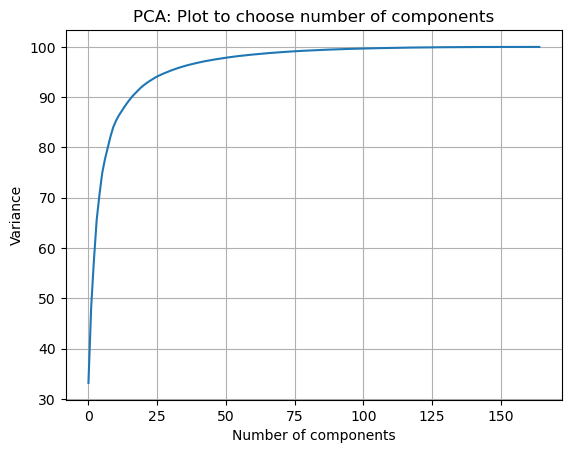

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7806451612903226 185.388


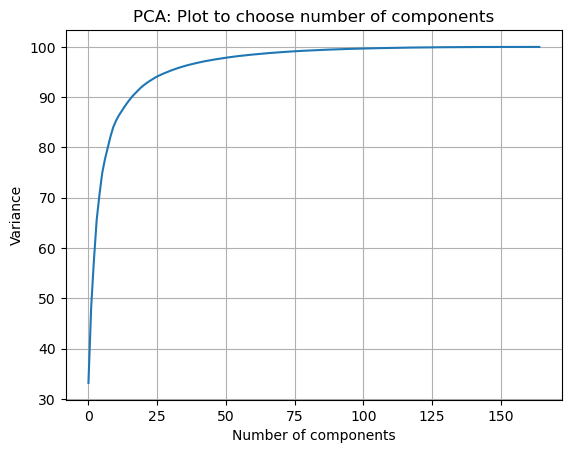

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7806451612903226 157.694


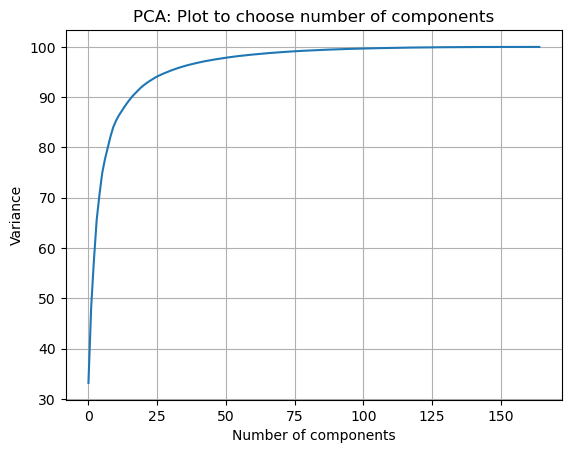

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.8 160.625


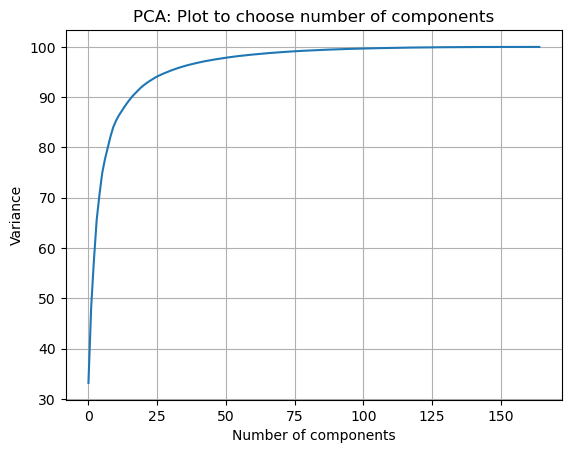

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7677419354838709 142.728


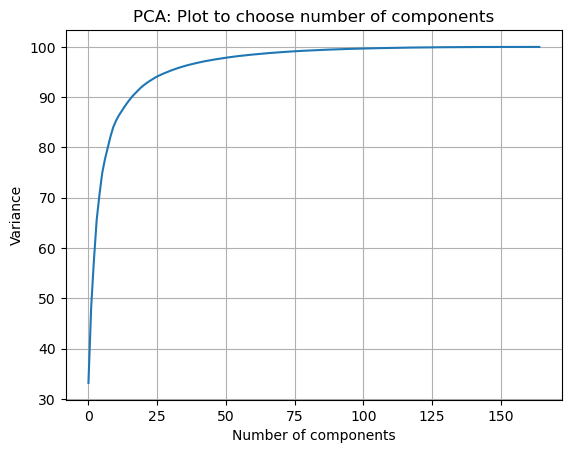

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7806451612903226 132.057


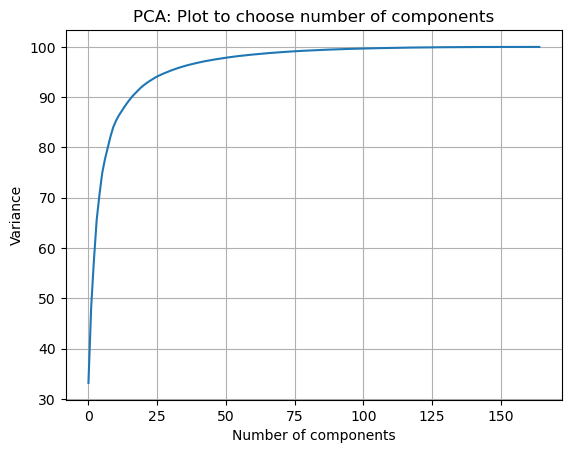

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7806451612903226 150.603


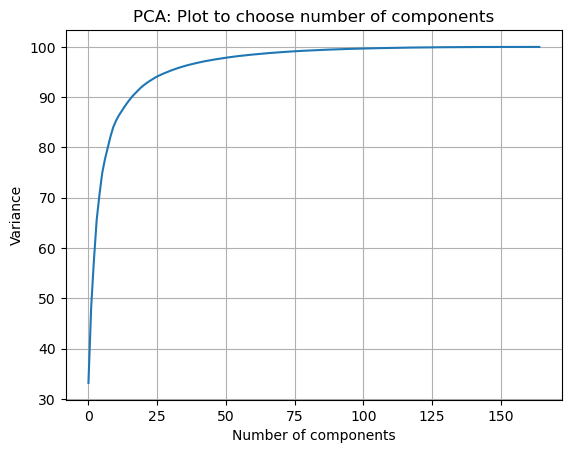

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7935483870967742 132.956


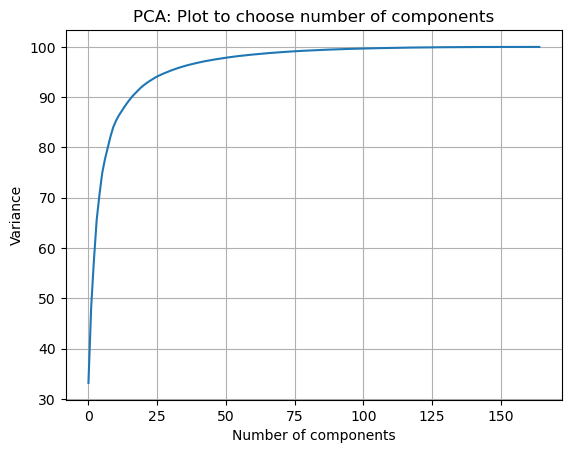

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7586206896551724 138.602


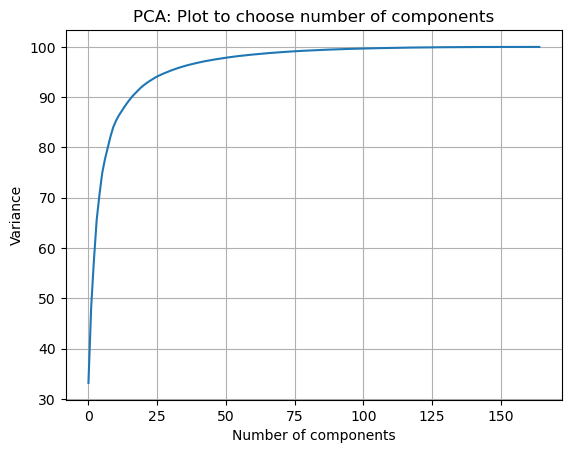

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.8 134.66


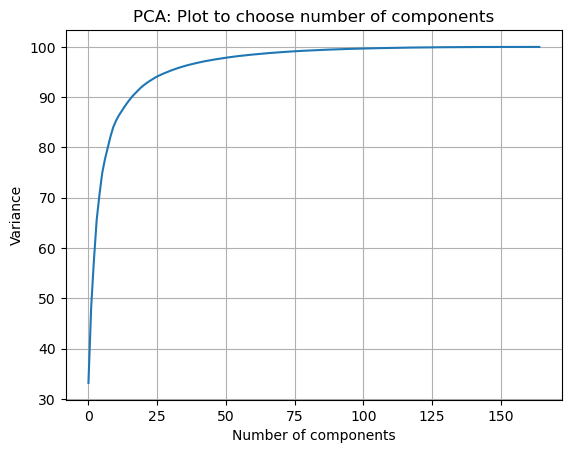

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7931034482758621 205.431


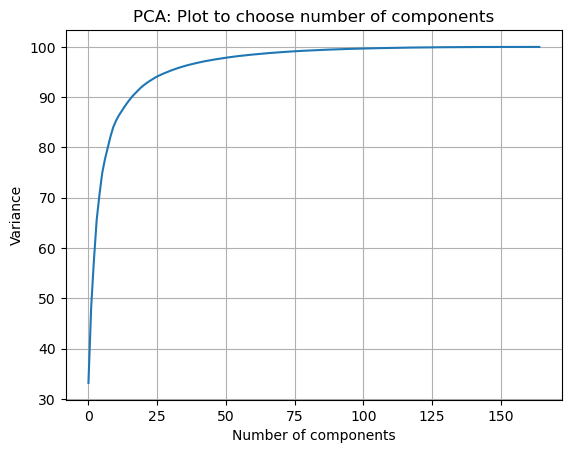

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7931034482758621 193.467


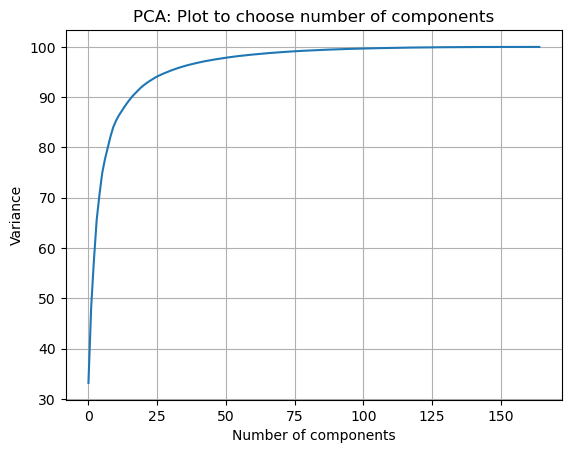

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7931034482758621 184.565


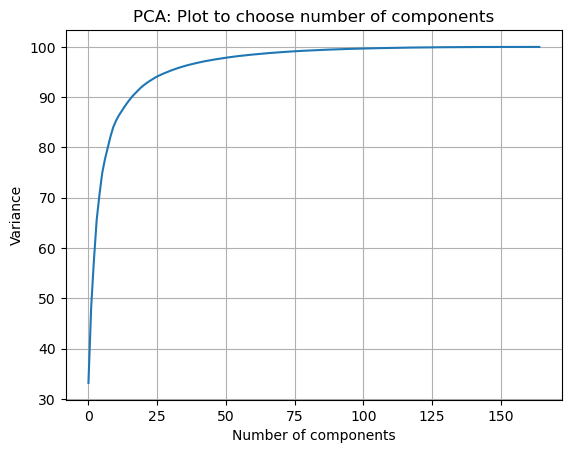

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7655172413793103 169.989


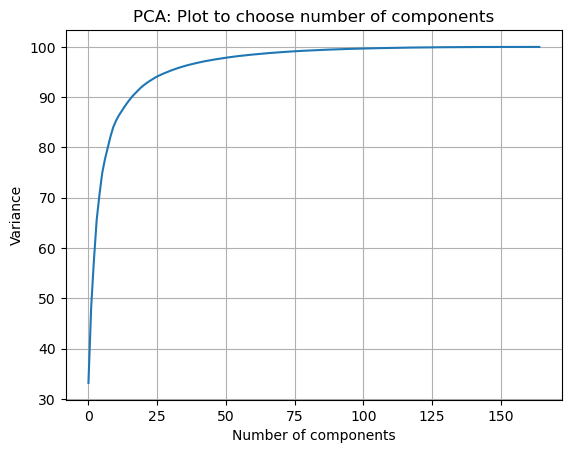

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.8068965517241379 128.816


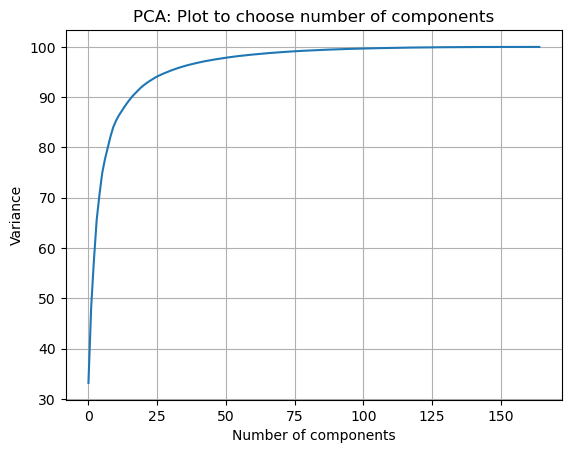

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7931034482758621 133.916


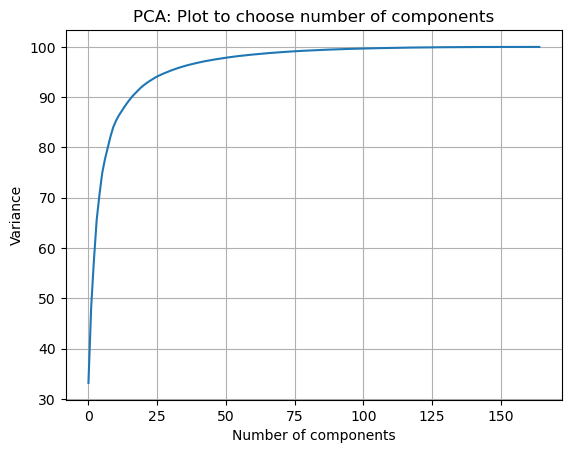

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7931034482758621 131.432


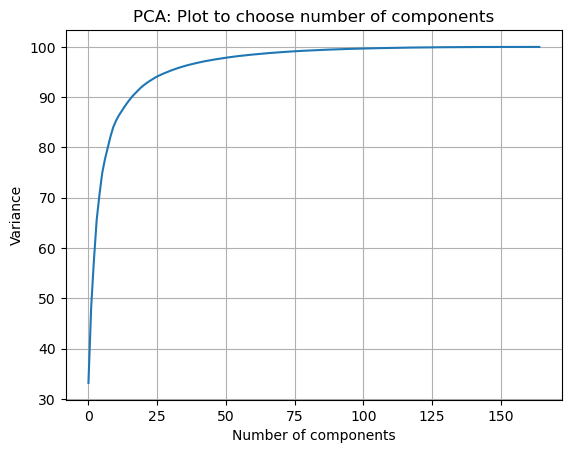

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7931034482758621 139.325


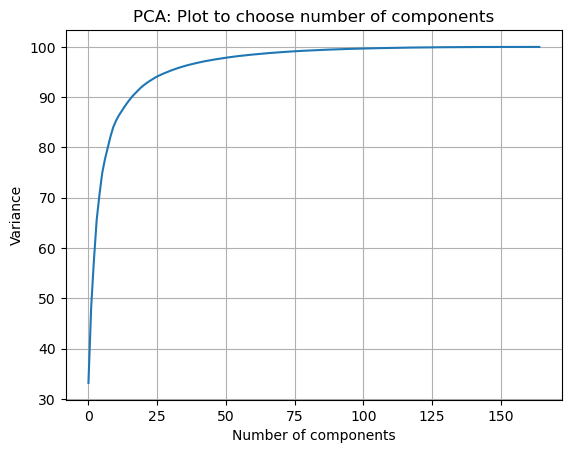

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.8068965517241379 138.999


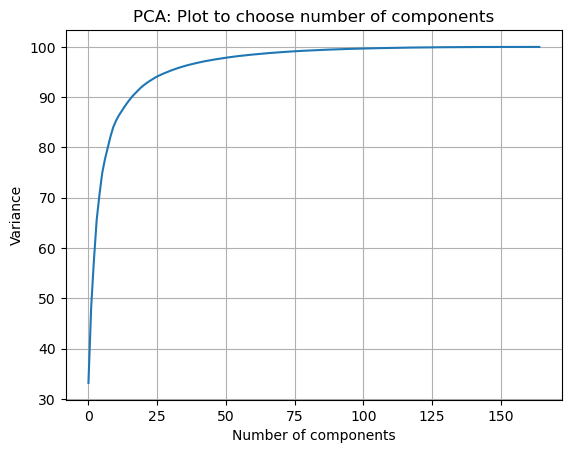

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.8068965517241379 137.717


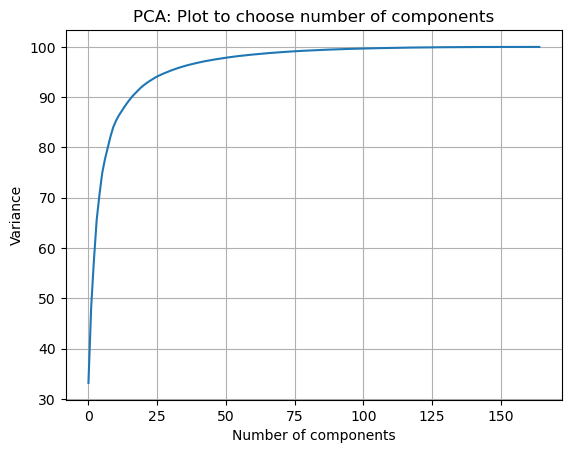

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7931034482758621 130.437


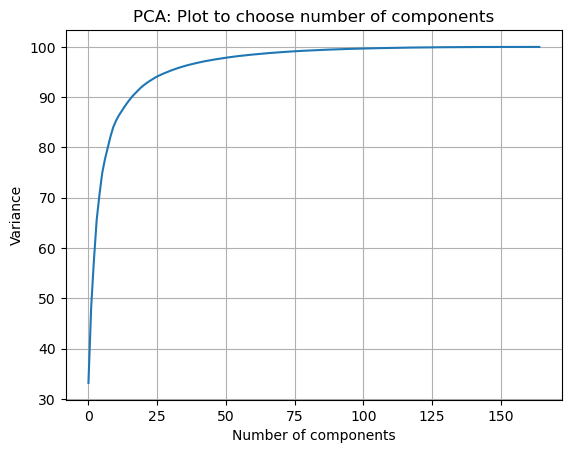

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.8068965517241379 139.359


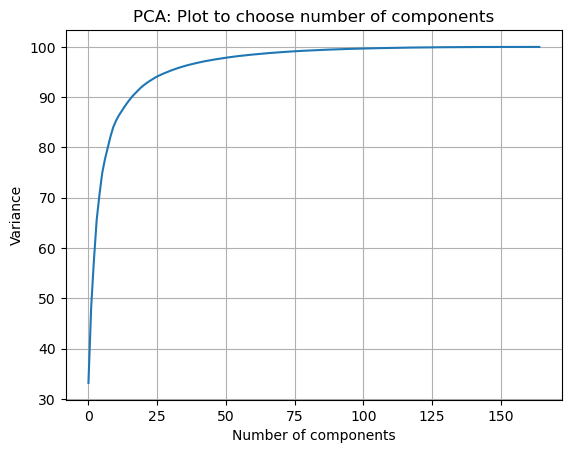

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.8 143.796


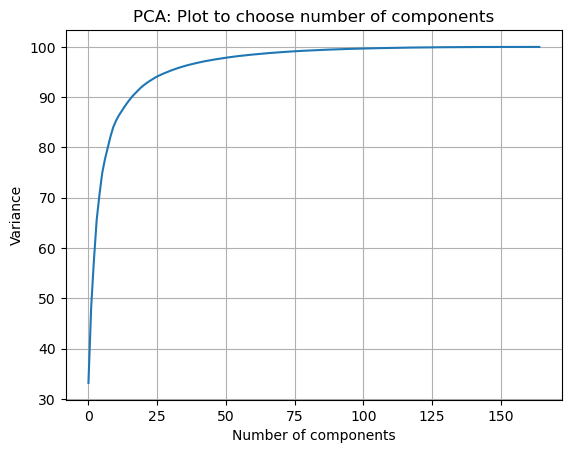

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7862068965517242 135.875


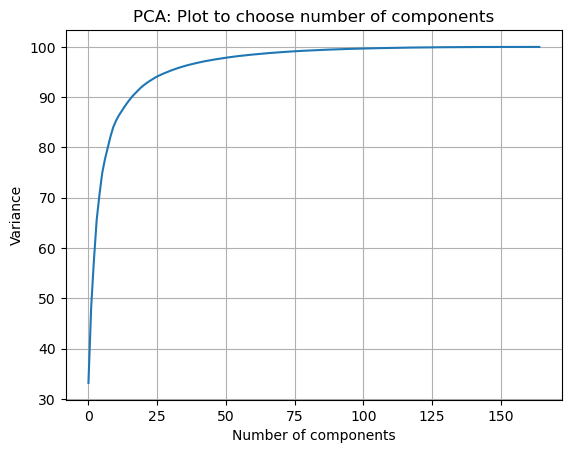

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7724137931034483 228.17


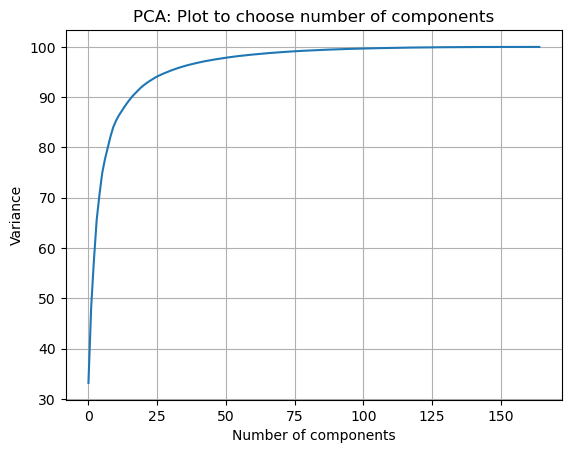

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7724137931034483 170.836


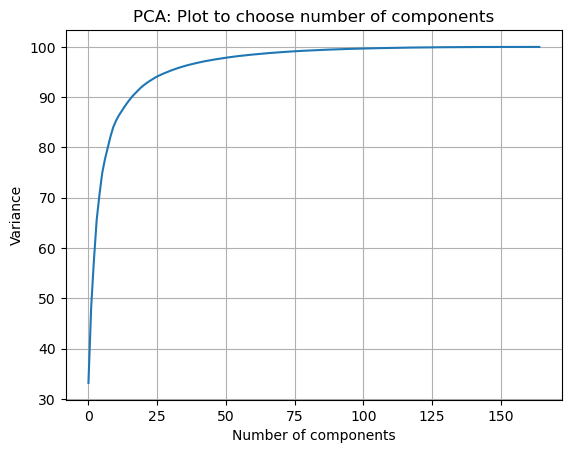

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7793103448275862 153.543


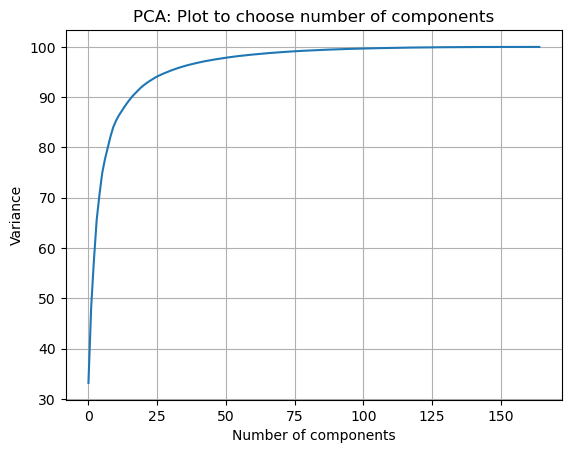

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.8 160.587


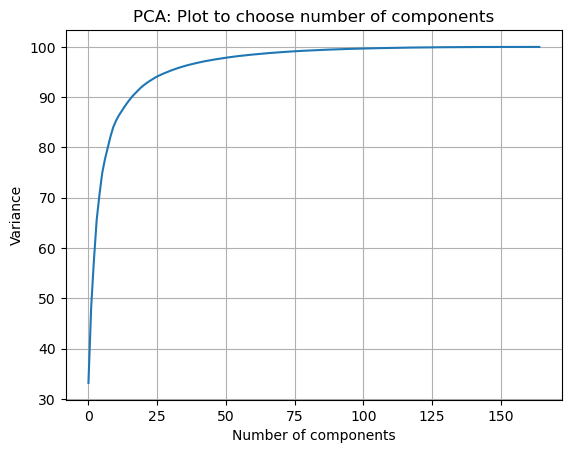

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7555555555555555 150.06


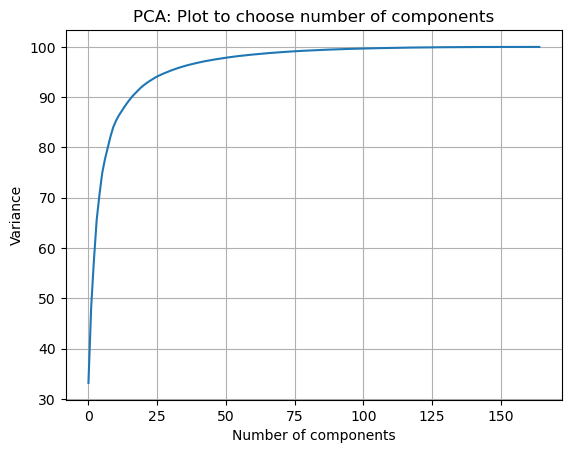

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.8074074074074075 134.725


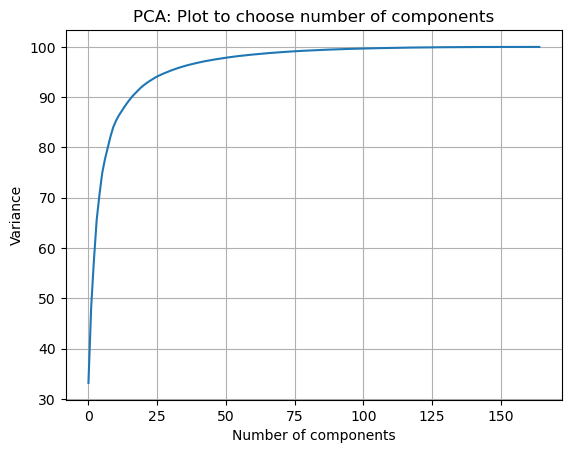

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7777777777777778 152.609


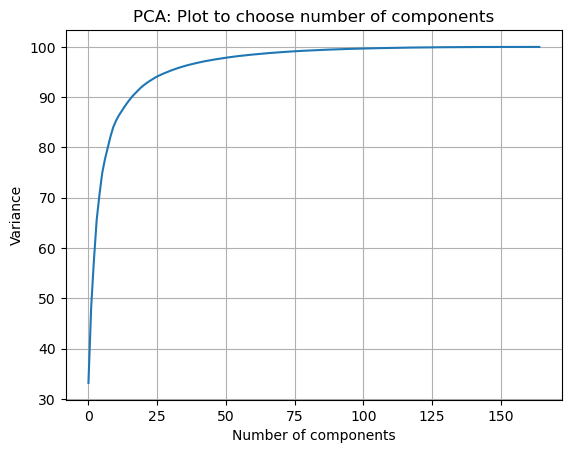

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7925925925925926 135.429


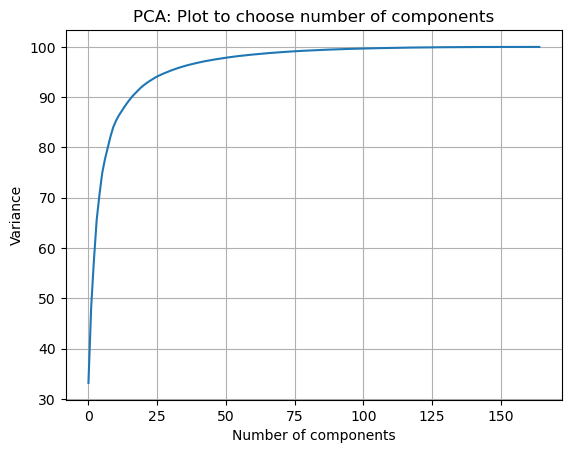

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7925925925925926 132.563


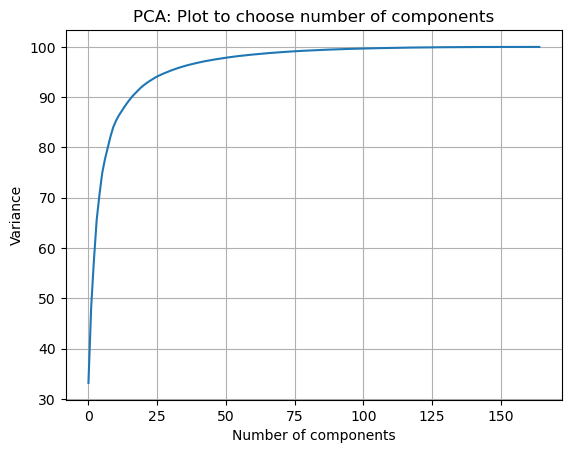

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7777777777777778 158.882


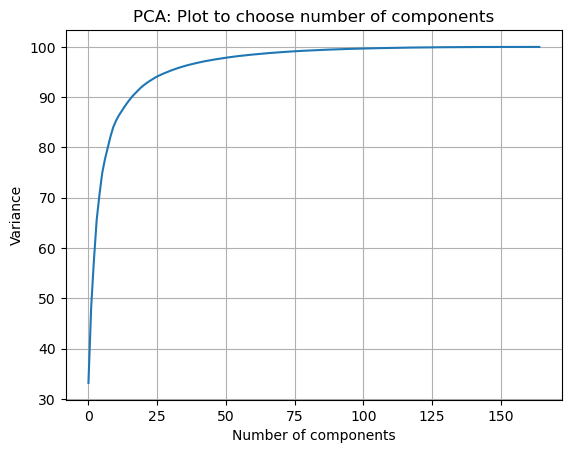

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.8148148148148148 133.673


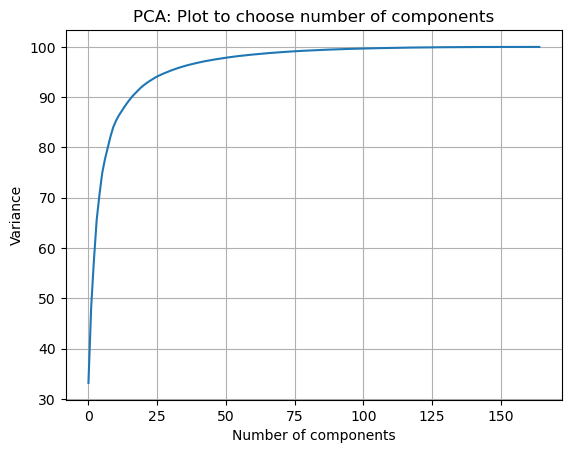

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7777777777777778 140.72


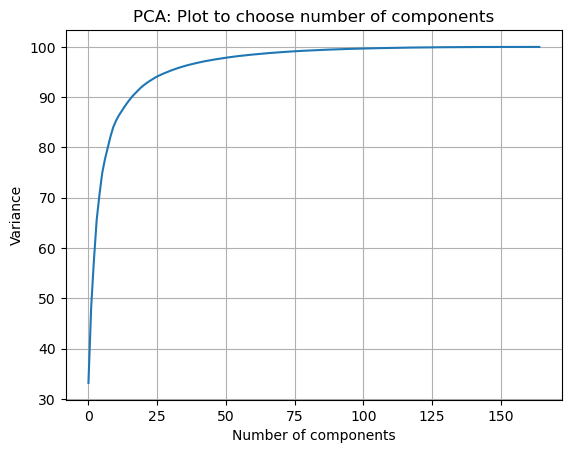

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.8074074074074075 127.418


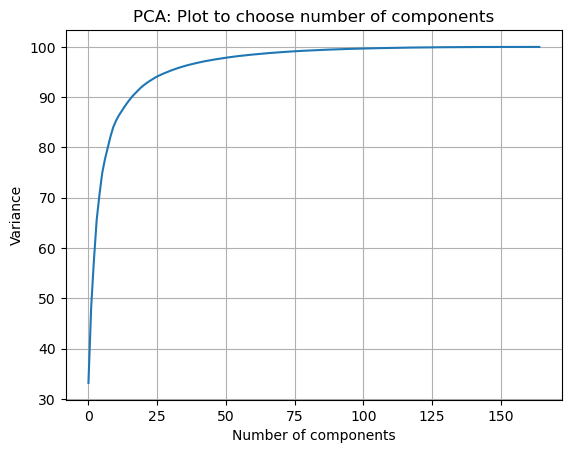

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.8074074074074075 130.406


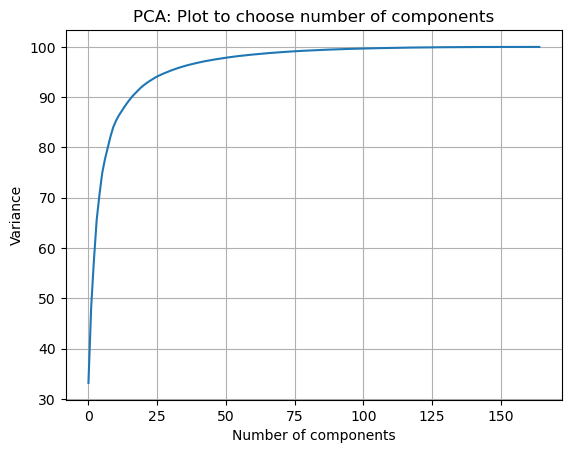

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.8074074074074075 212.473


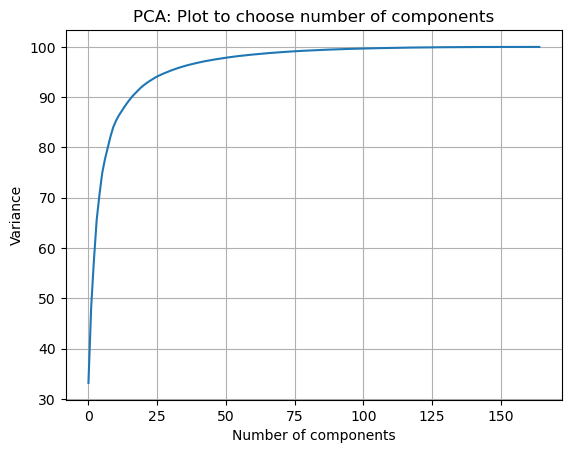

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.8074074074074075 140.721


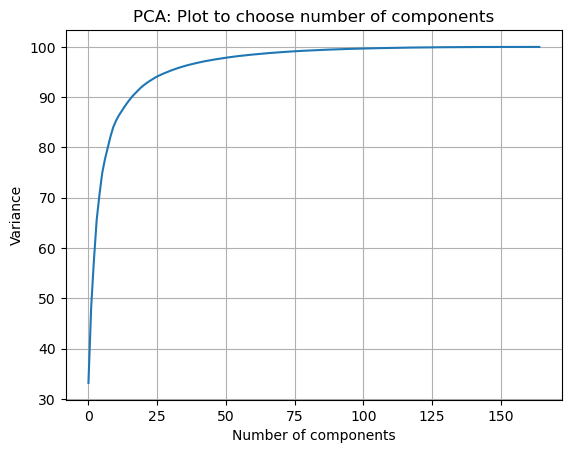

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7851851851851852 136.823


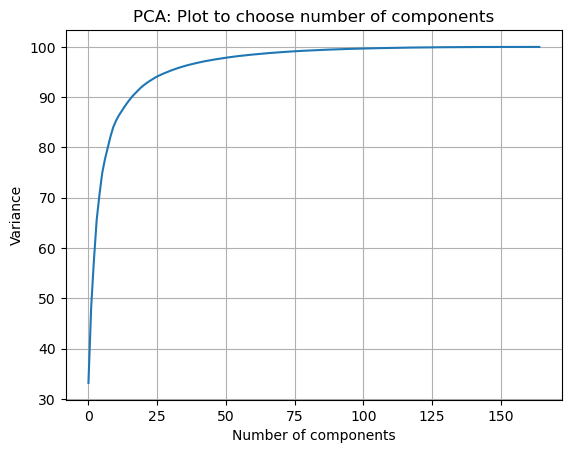

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.8148148148148148 130.871


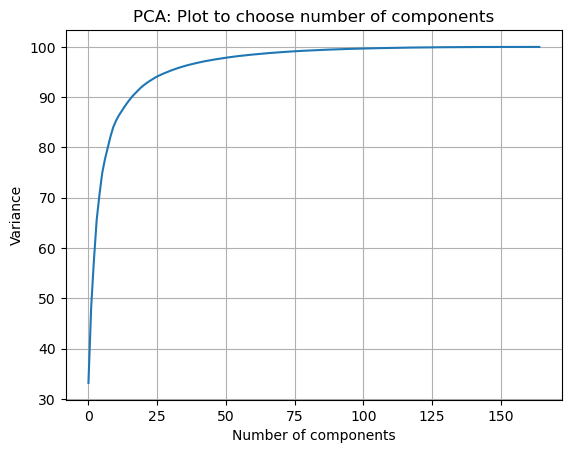

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7777777777777778 130.932


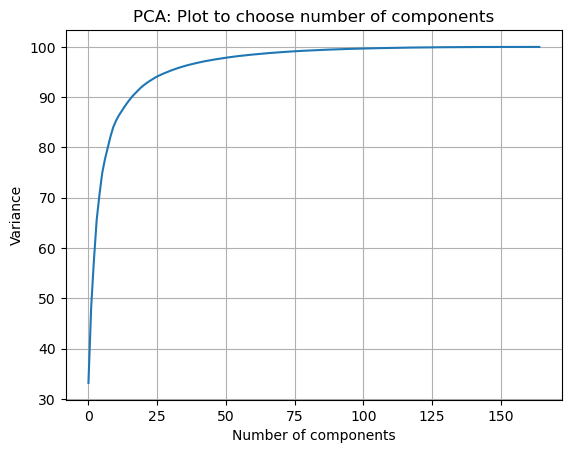

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.8074074074074075 129.934


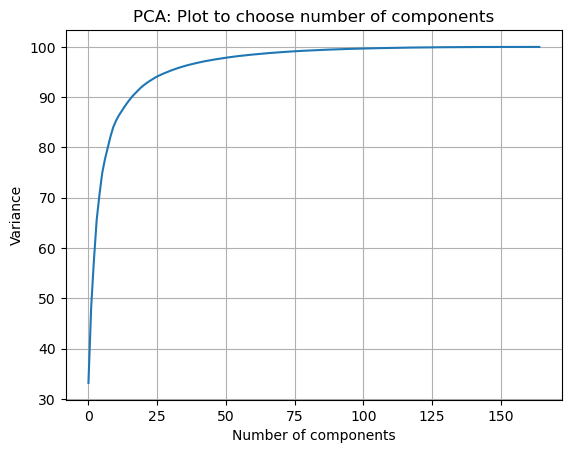

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7703703703703704 139.374


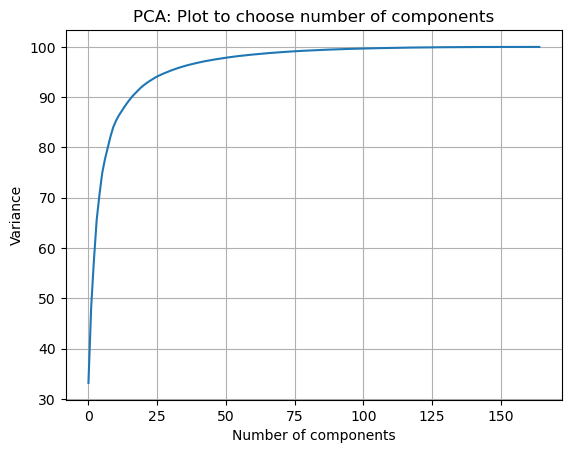

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.762962962962963 125.988


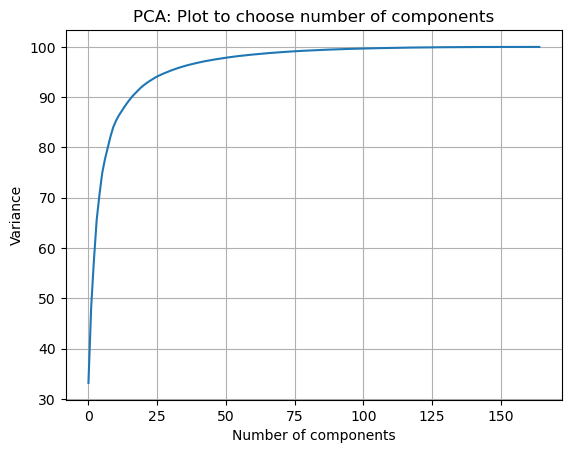

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7851851851851852 136.889


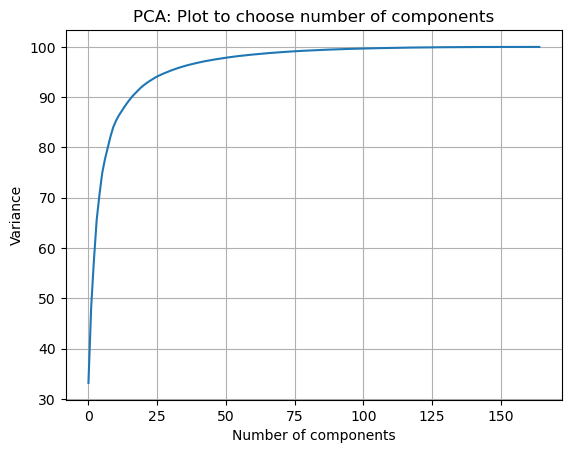

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73
Accuracy= 0.7851851851851852 156.938


,10,20,30
Accuracy,0.788065,0.79069,0.790741
Time taken,151.258 ms,154.976 ms,141.871 ms


In [11]:
create_table(img,labels,LDA,'LDA')

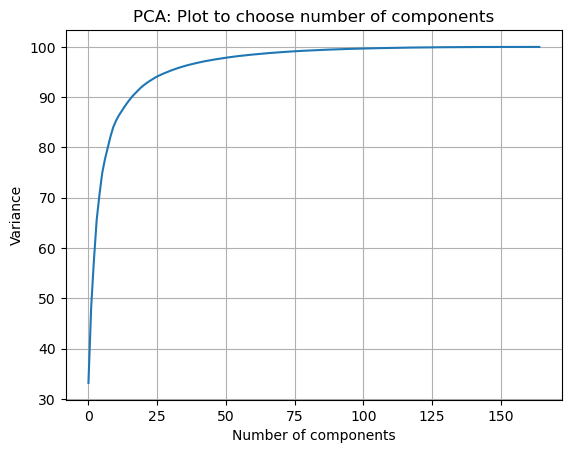

With tolerance (of variance, in percentage)= 99 
Number of components chosen for PCA: 73


,10,20,30
Accuracy,0.144516,0.148276,0.163333
Time taken,4.514 ms,3.028 ms,2.542 ms


In [12]:
create_table(preprocessing(img),labels,baseline,'base')